In [1]:
import sys


import behav_viz.ingest as ingest
import behav_viz.visualize as viz

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from behav_viz.utils import plot_utils as pu
from behav_viz.visualize.df_preperation import *
sns.set_context("talk")


%load_ext autoreload
%autoreload 2   

[2024-08-14 17:06:58,483][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2024-08-14 17:06:59,878][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [37]:
ANIMALS = [
    "R040",
    "R041",
    "R042",
    "R043",
    "R044",
    "R045",
    "R046",
    "R047",
    "R048",
    "R049",
    "R050",
    "R051",
    "R052",
    "R053",
    "R054",
    "R055",
    "R056",
    "R057",
]

date_min = "2024-07-20"
date_max = "2024-08-16"

tdf = ingest.create_trials_df.create_trials_df_from_dj(ANIMALS, date_min, date_max)
ddf = ingest.create_days_df.create_days_df_from_dj(ANIMALS, date_min, date_max)

[2024-08-15 13:39:51,794][WARNING]: MySQL server has gone away. Reconnecting to the server.


animal_id R040
Fetched 26 dates from Sessions table from 2024-07-20 to 2024-08-14 for R040

animal_id R041
Fetched 26 dates from Sessions table from 2024-07-20 to 2024-08-14 for R041

animal_id R042
Fetched 26 dates from Sessions table from 2024-07-20 to 2024-08-14 for R042

animal_id R043
Fetched 27 dates from Sessions table from 2024-07-20 to 2024-08-14 for R043

animal_id R044
Fetched 25 dates from Sessions table from 2024-07-20 to 2024-08-14 for R044

animal_id R045
Fetched 25 dates from Sessions table from 2024-07-20 to 2024-08-14 for R045

animal_id R046
Fetched 26 dates from Sessions table from 2024-07-20 to 2024-08-14 for R046

animal_id R047
Fetched 23 dates from Sessions table from 2024-07-20 to 2024-08-13 for R047

animal_id R048
Fetched 19 dates from Sessions table from 2024-07-27 to 2024-08-14 for R048

animal_id R049
Fetched 16 dates from Sessions table from 2024-07-29 to 2024-08-14 for R049

animal_id R050
Fetched 19 dates from Sessions table from 2024-07-27 to 2024-08-1

# 1. Robustness

## 1.1 Stage Progression

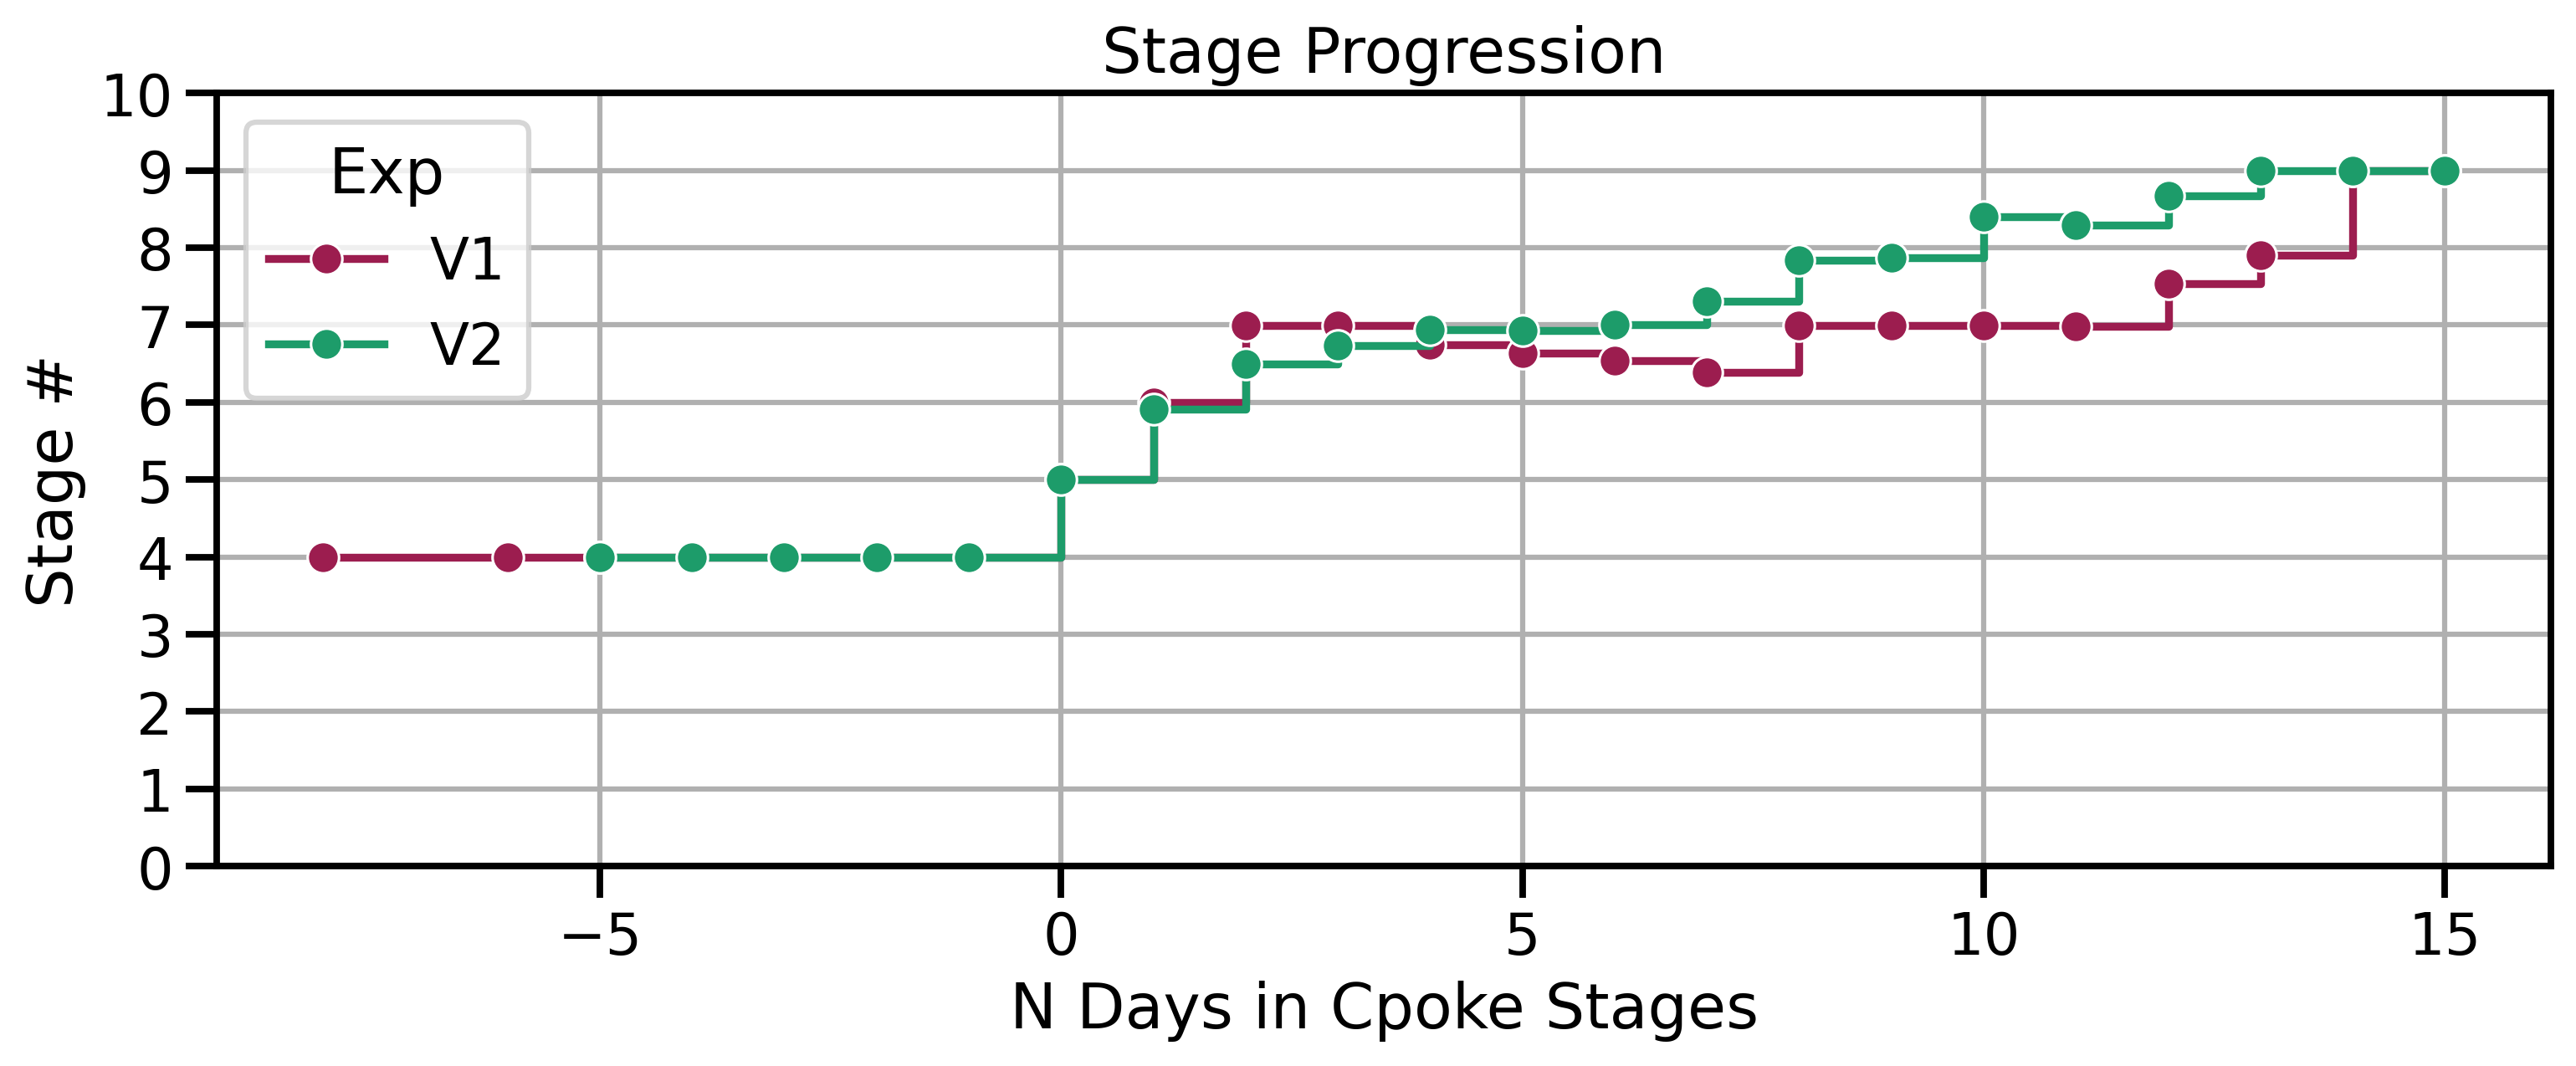

In [33]:
fig, ax = pu.make_fig()
viz.FixationGrower.exp_compare_alpha.plot_stage_compare_experiments(
    tdf.query("stage >=4 and stage <=9").copy(),
    ax=ax,
    rotate_x_labels=False,
    relative_to_stage=5,
    plot_individuals=False,
    ylim=(0, 10),
    title="Stage Progression",
)
ax.set(xlabel="N Days in Cpoke Stages", title="Stage Progression")
ax.legend(title="Exp")

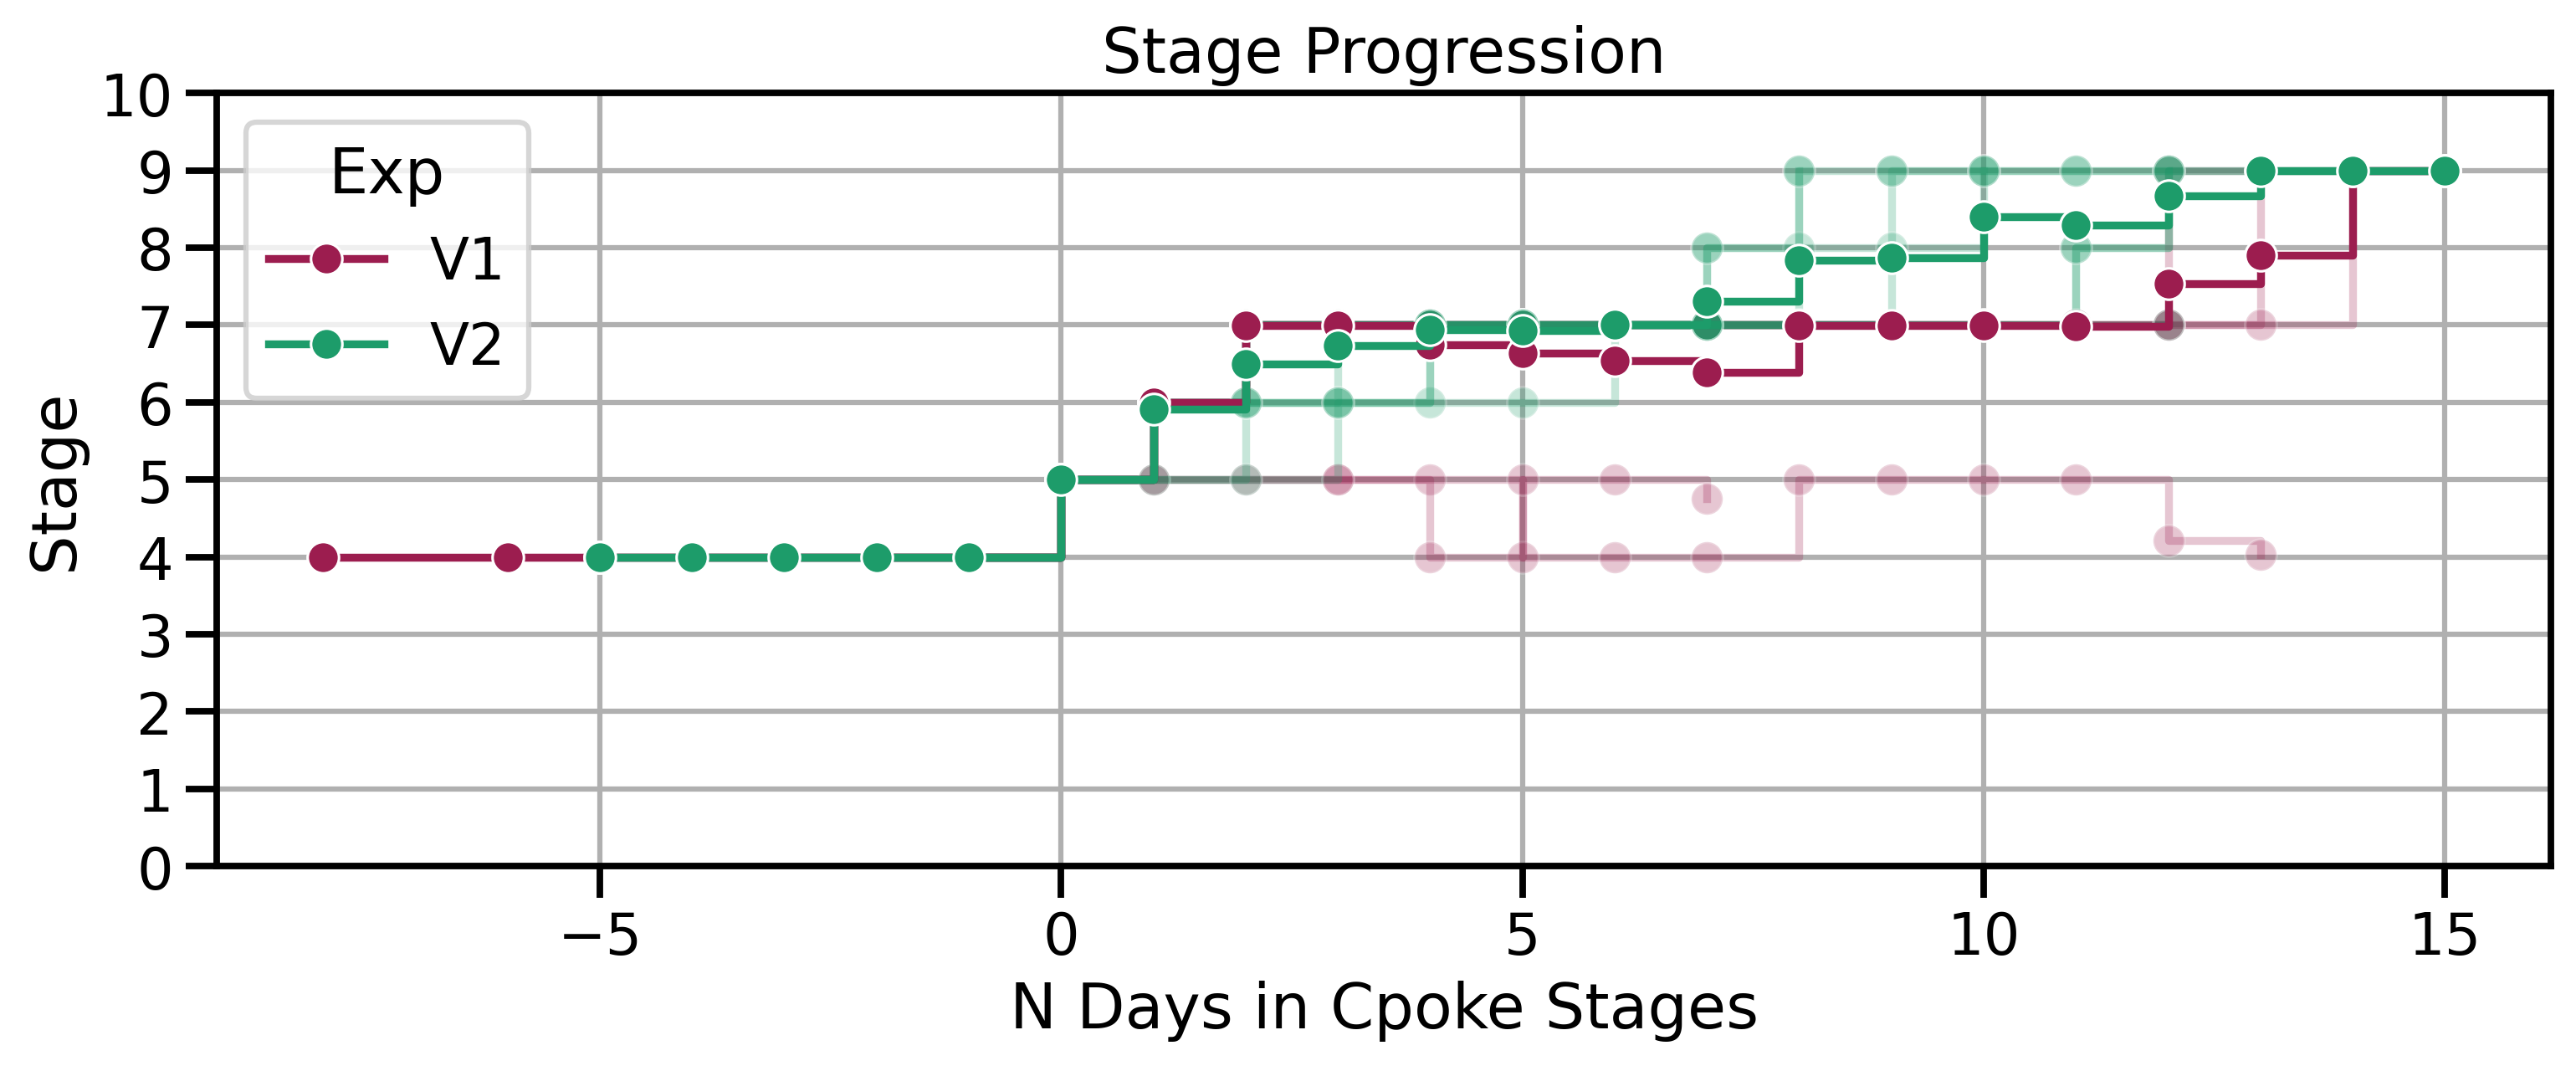

In [31]:
fig, ax = pu.make_fig()
viz.FixationGrower.exp_compare_alpha.plot_stage_compare_experiments(
    tdf.query("stage >=4 and stage <=9").copy(),
    ax=ax,
    rotate_x_labels=False,
    relative_to_stage=5,
    plot_individuals=True,
    ylim=(0, 10),
    title="Stage Progression",
)
ax.set(xlabel="N Days in Cpoke Stages")
ax.legend(title="Exp")

### 1.1.1 Stage Progression Issue

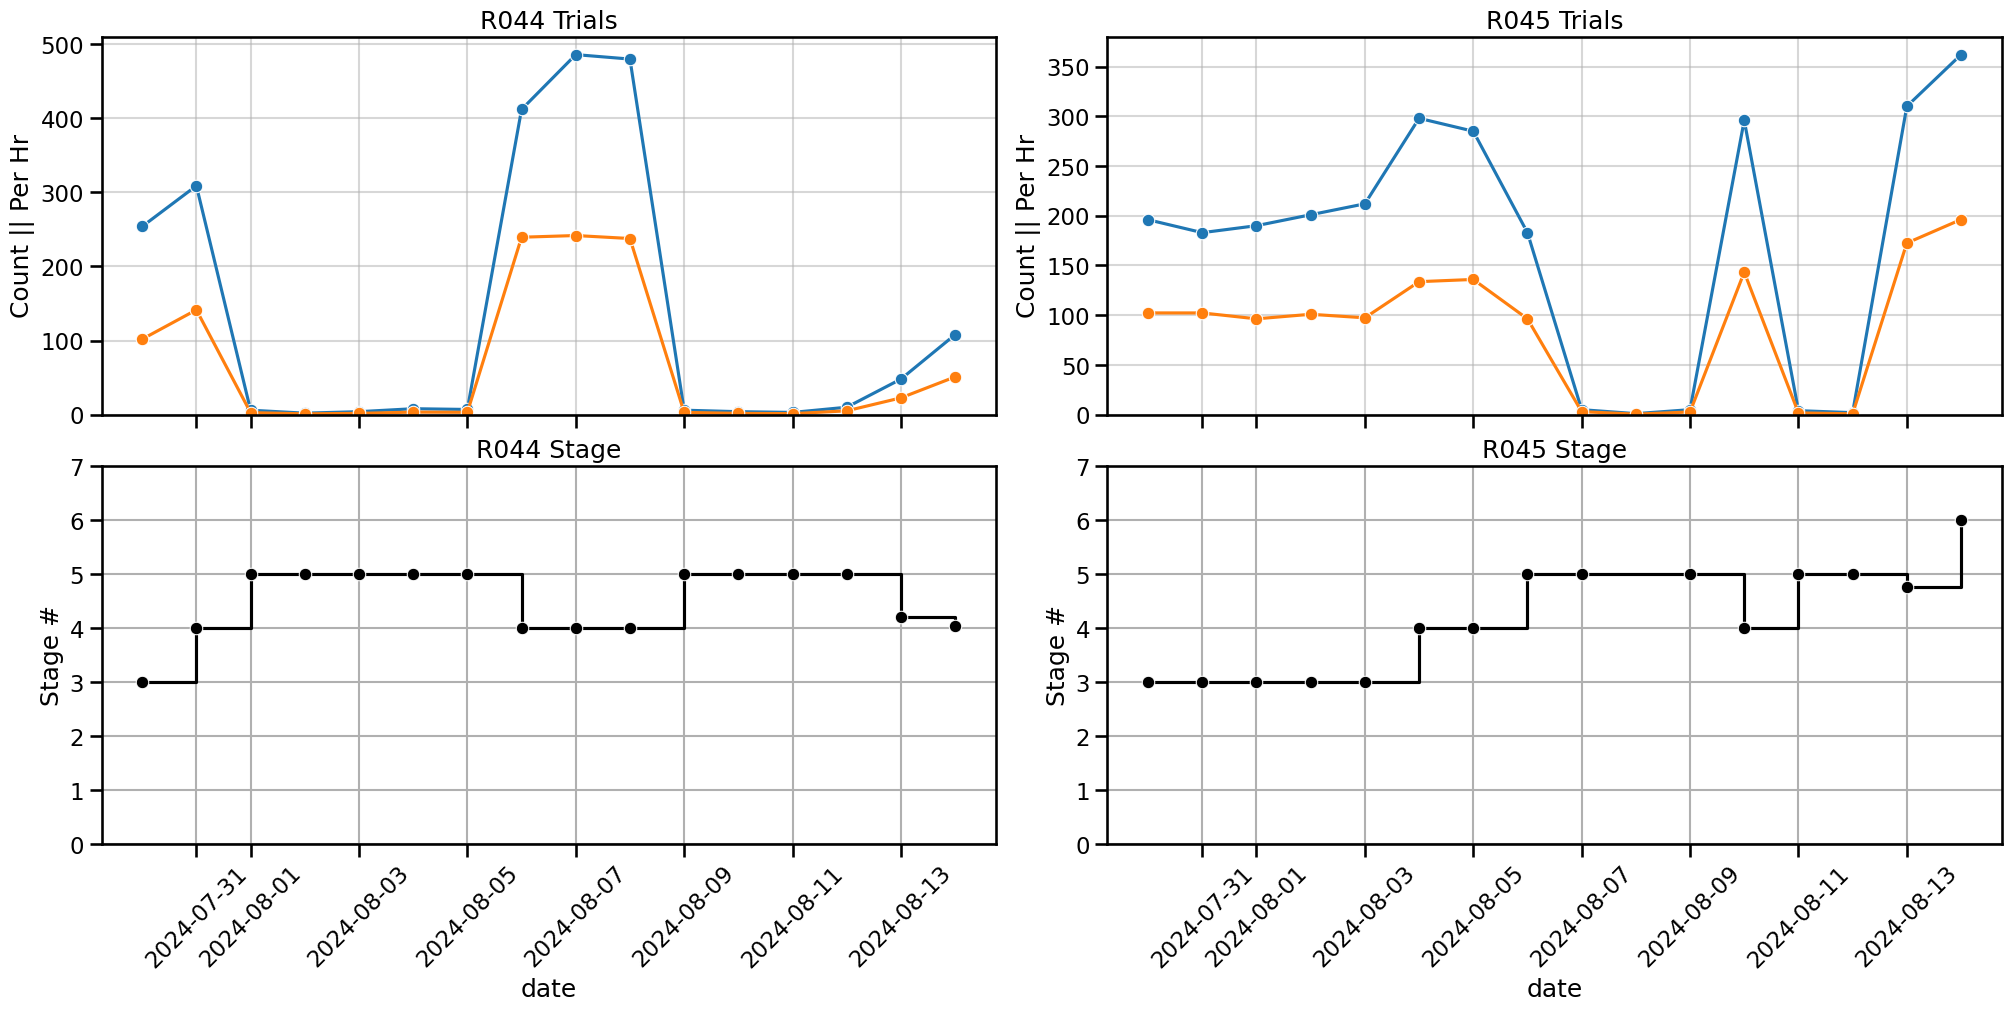

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10), constrained_layout=True, sharex=True)

# Top row- trials
date = "2024-07-29"
viz.plot_days_info.plot_trials(
    ddf.query("animal_id == 'R044' and date > @date"),
    ax=ax[0, 0],
    title="R044 Trials",
)
viz.plot_days_info.plot_trials(
    ddf.query("animal_id == 'R054' and date > @date"),
    ax=ax[0, 1],
    title="R045 Trials",
)

# Bottom row- stage
date = pd.Timestamp("2024-07-29").date()
viz.plot_days_info.plot_stage(
    tdf.query("animal_id == 'R044' and date > @date"),
    ax=ax[1, 0],
    title="R044 Stage",
    rotate_x_labels=True,
    color="black",
    ylim=(0, 7),
)

viz.plot_days_info.plot_stage(
    tdf.query("animal_id == 'R054' and date > @date"),
    ax=ax[1, 1],
    title="R045 Stage",
    rotate_x_labels=True,
    color="black",
    ylim=(0, 7),
)

## 1.2 Fixation Growth

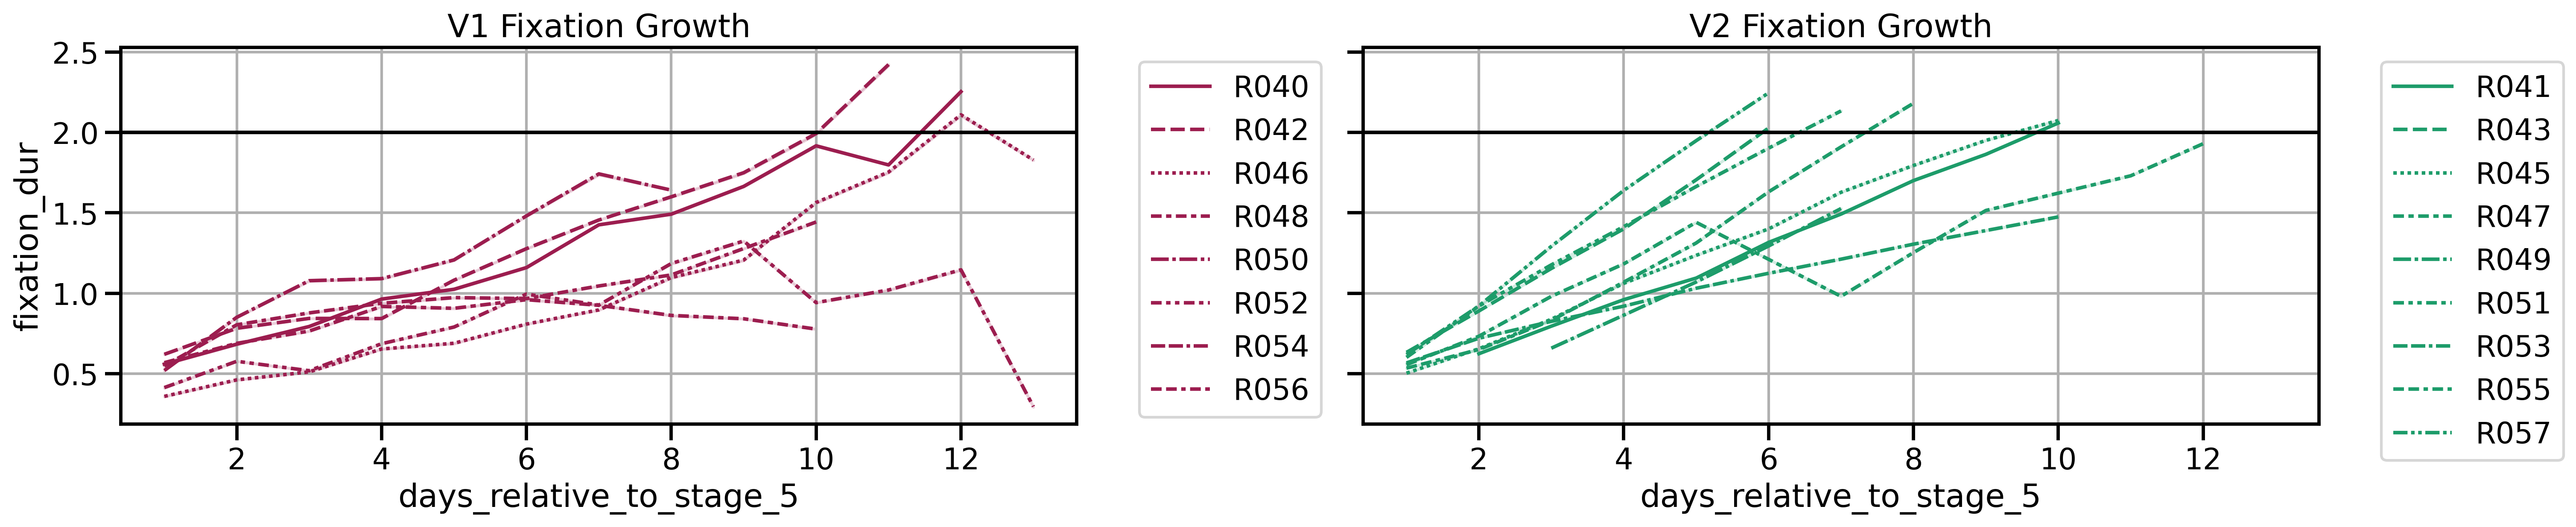

In [91]:
fig, ax = plt.subplots(
    1, 2, figsize=(20, 4), sharey=True, sharex=True, constrained_layout=True, dpi=300
)
tdf = viz.df_preperation.compute_days_relative_to_stage(tdf, stage=5)
for ii, (exp, sub_df) in enumerate(tdf.groupby("fix_experiment")):

    sns.lineplot(
        data=sub_df.query("stage > 5 and stage < 8"),
        x="days_relative_to_stage_5",
        y="fixation_dur",
        style="animal_id",
        estimator="max",
        color=pu.ALPHA_PALLETTE[ii],
        ax=ax[ii],
        lw=2,
    )
    ax[ii].grid()
    ax[ii].set_title(f"{exp} Fixation Growth")
    ax[ii].legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    ax[ii].axhline(2, color="k", lw=2)

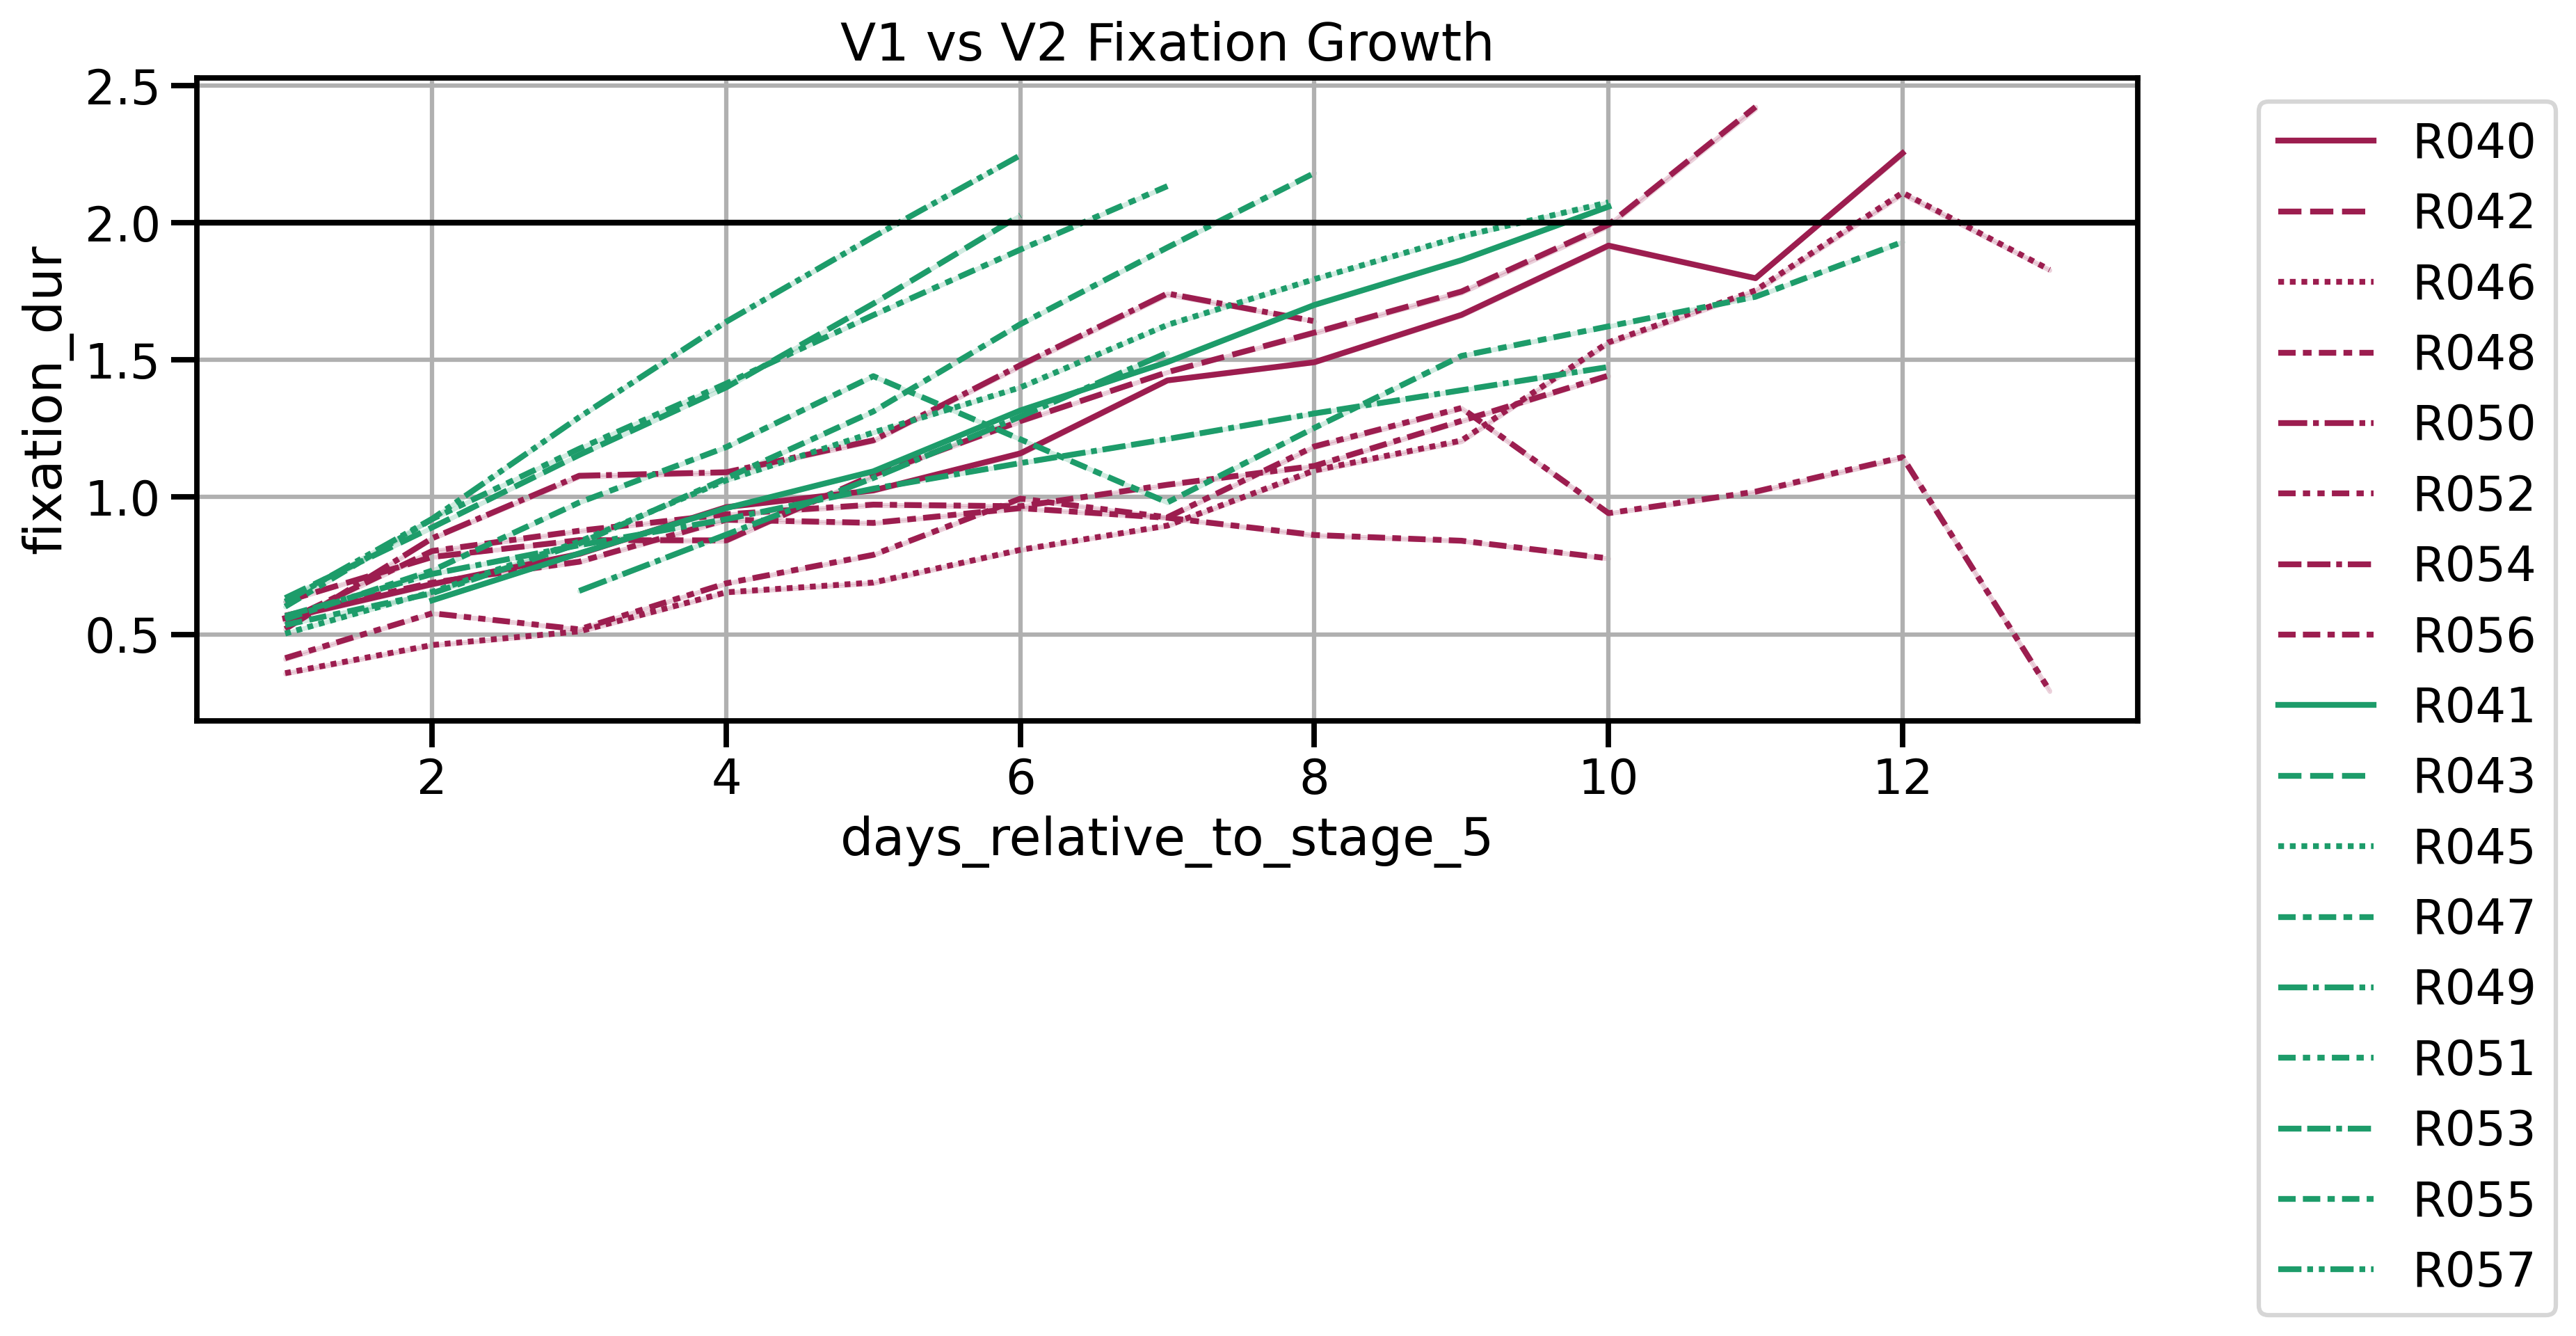

In [90]:
fig, ax = pu.make_fig()
tdf = viz.df_preperation.compute_days_relative_to_stage(tdf, stage=5)
for ii, (exp, sub_df) in enumerate(tdf.groupby("fix_experiment")):

    sns.lineplot(
        data=sub_df.query("stage > 5 and stage < 8"),
        x="days_relative_to_stage_5",
        y="fixation_dur",
        style="animal_id",
        estimator="max",
        color=pu.ALPHA_PALLETTE[ii],
        ax=ax,
        lw=2,
    )
ax.grid()
ax.set_title(f"V1 vs V2 Fixation Growth")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.axhline(2, color="k", lw=2)

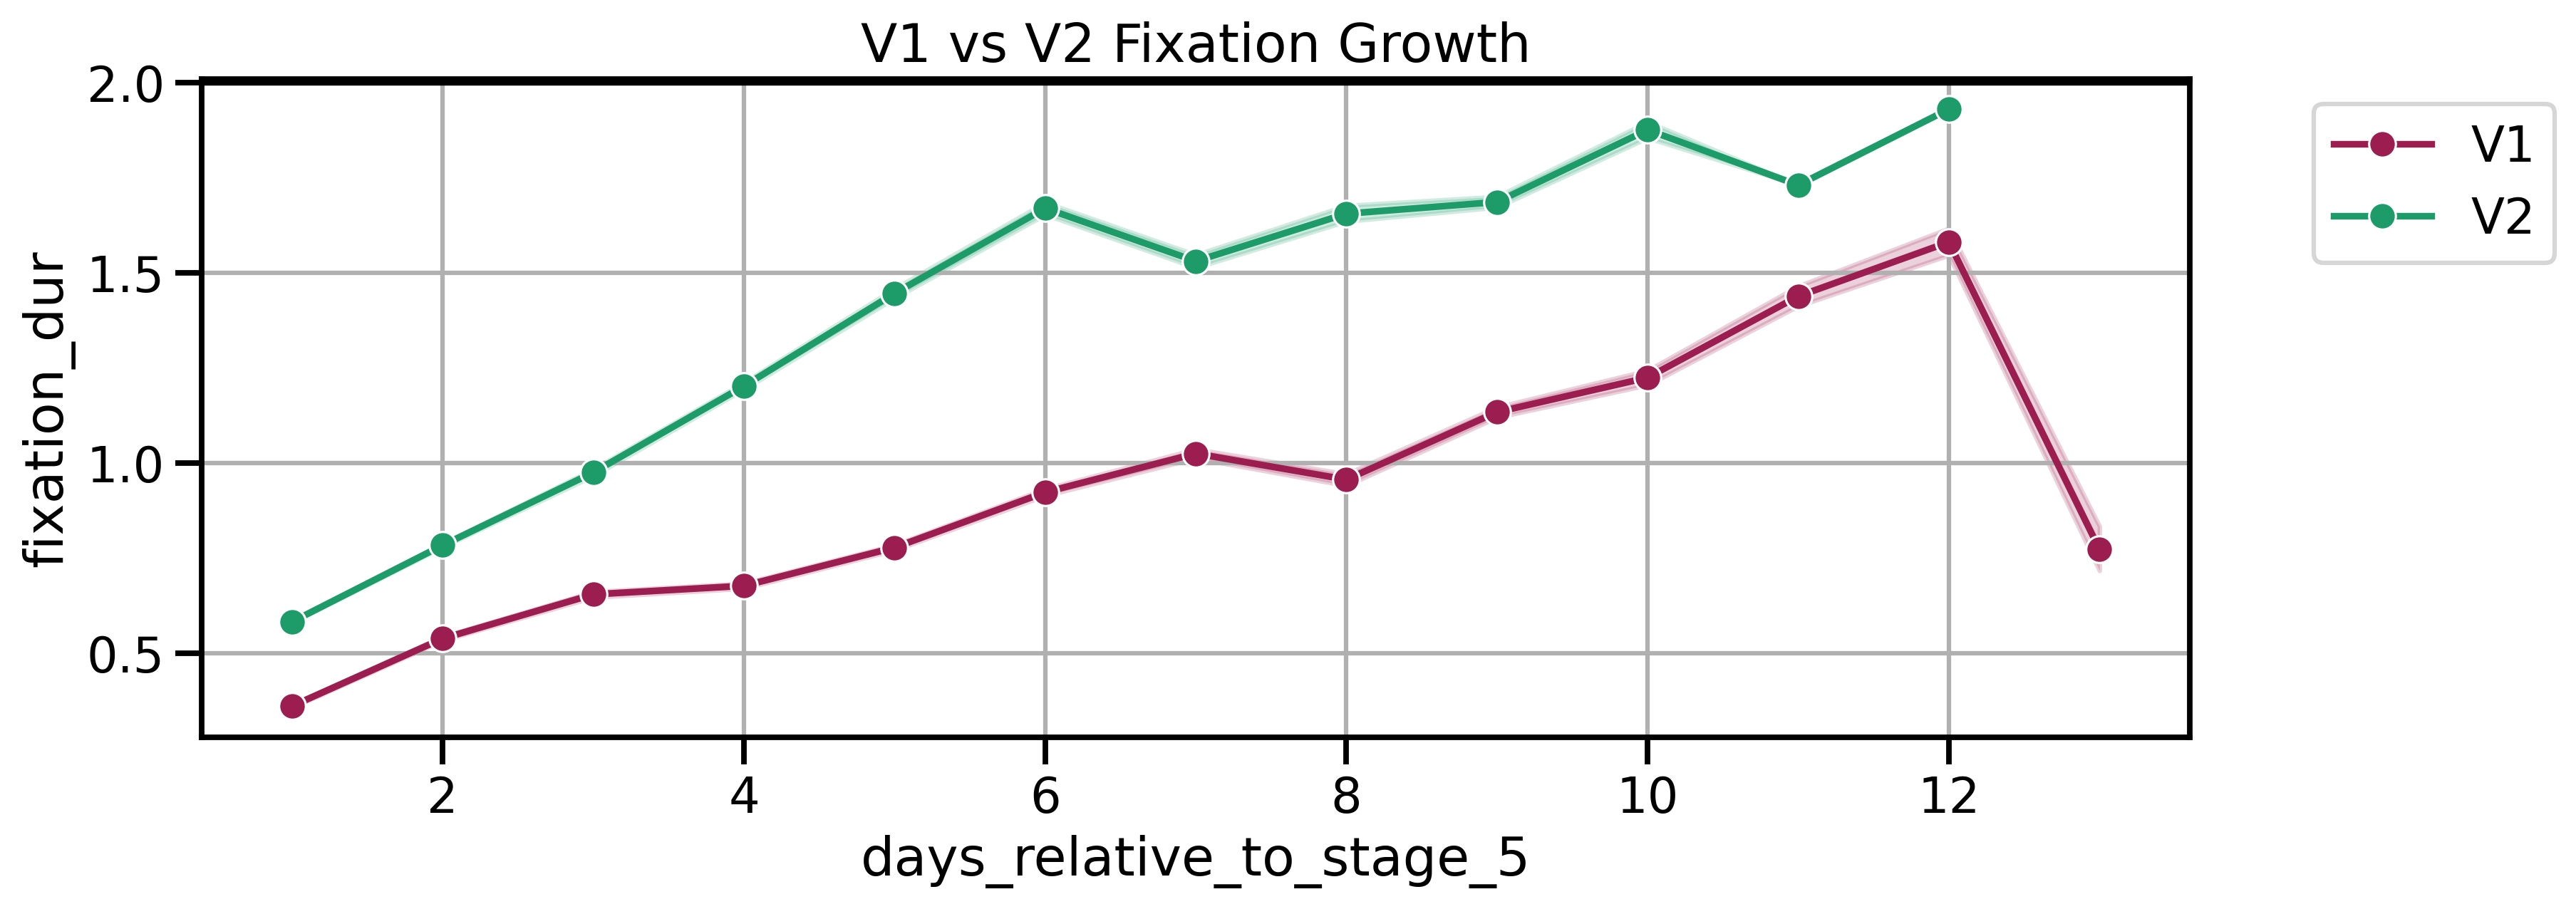

In [95]:
fig, ax = pu.make_fig()

sns.lineplot(
    data=tdf.query("stage > 5 and stage < 8"),
    x="days_relative_to_stage_5",
    y="fixation_dur",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    marker="o",
    ax=ax,
)
ax.grid()
ax.set_title(f"V1 vs V2 Fixation Growth")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.axhline(2, color="k", lw=2)

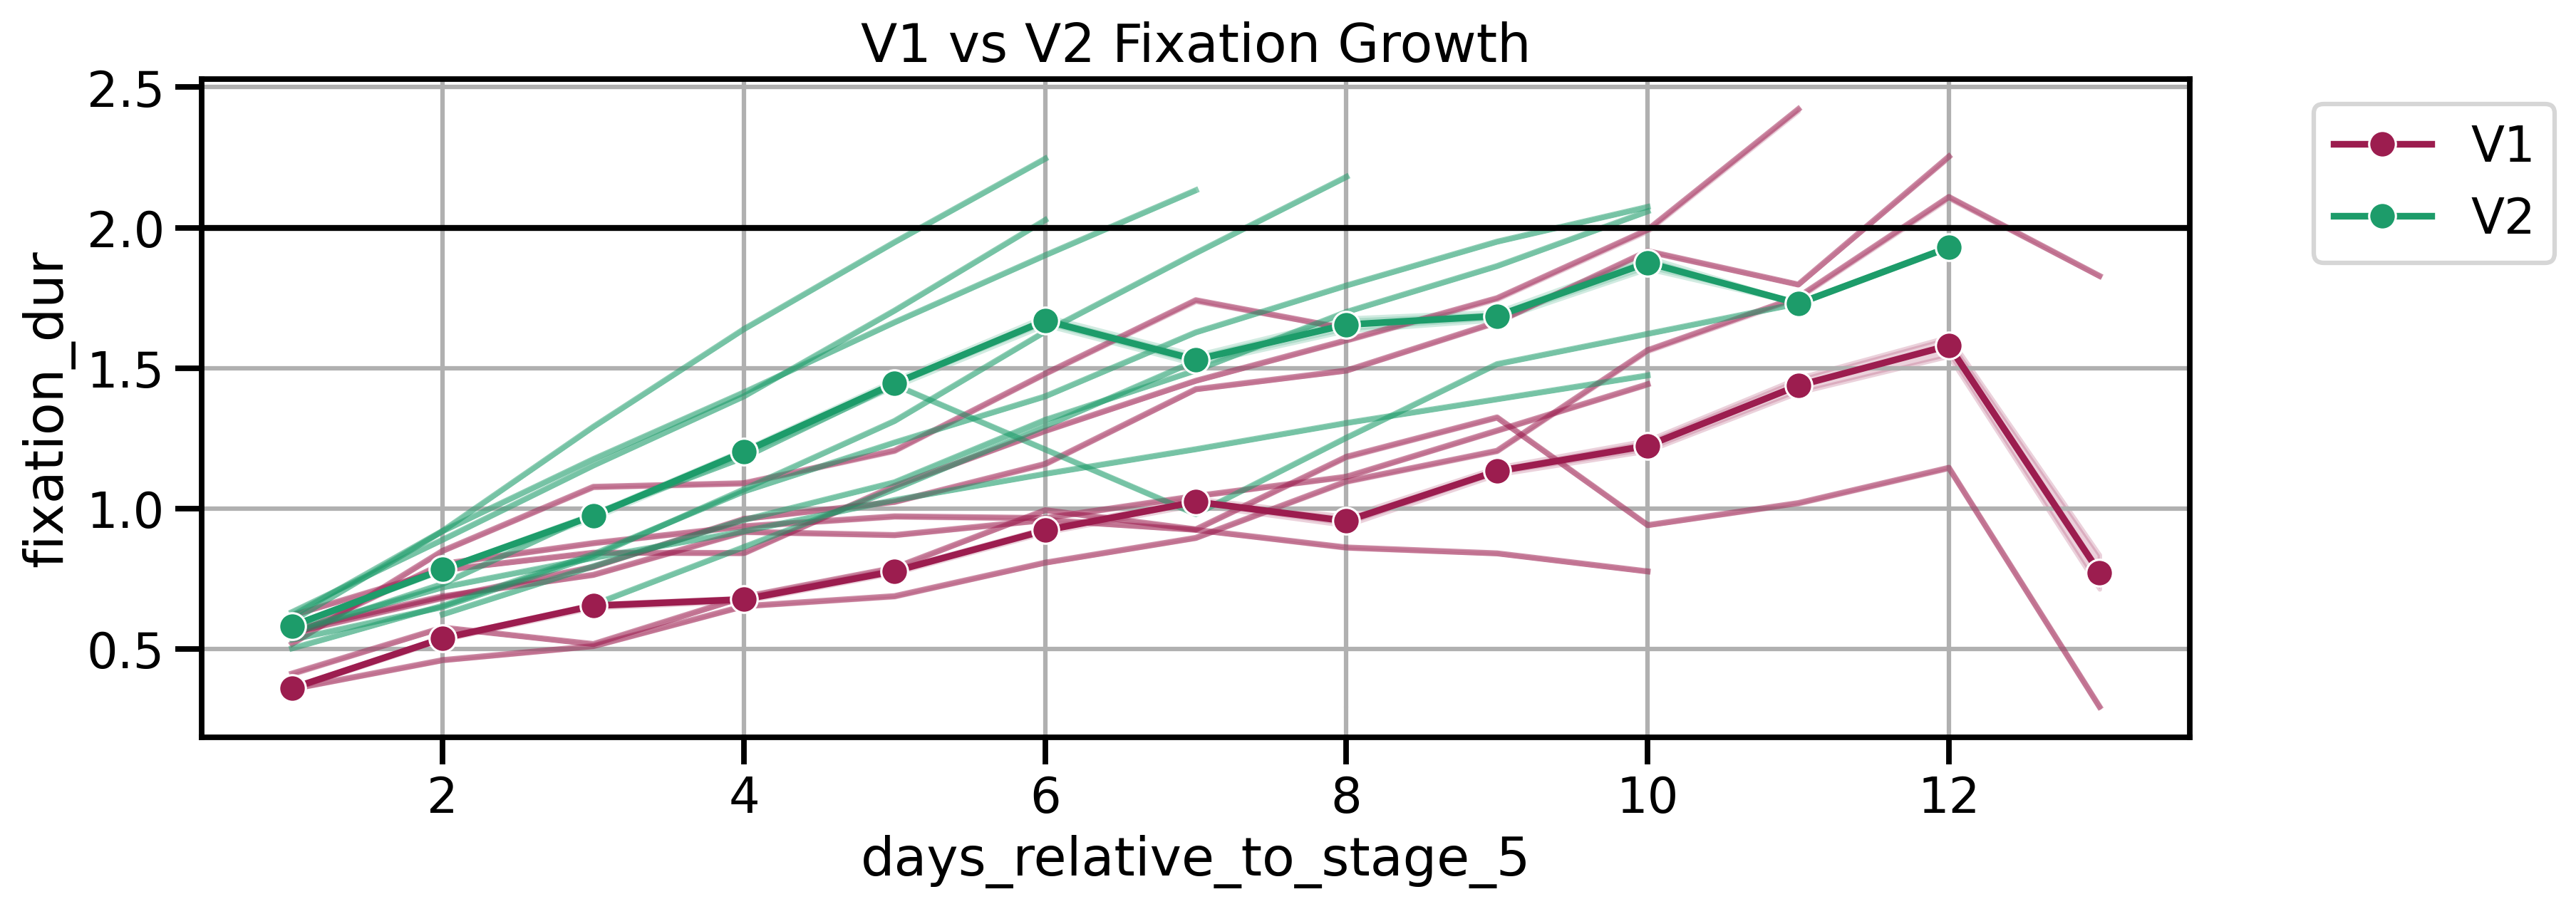

In [102]:
fig, ax = pu.make_fig()


for ii, (exp, sub_df) in enumerate(tdf.groupby("fix_experiment")):
    for animal_id, sub_sub_df in sub_df.groupby("animal_id"):
        sns.lineplot(
            data=sub_sub_df.query("stage > 5 and stage < 8"),
            x="days_relative_to_stage_5",
            y="fixation_dur",
            estimator="max",
            color=pu.ALPHA_PALLETTE[ii],
            ax=ax,
            lw=2,
            alpha=0.5,
        )
sns.lineplot(
    data=tdf.query("stage > 5 and stage < 8"),
    x="days_relative_to_stage_5",
    y="fixation_dur",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    marker="o",
    estimator="mean",
    ax=ax,
)
ax.grid()
ax.set_title(f"V1 vs V2 Fixation Growth")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.axhline(2, color="k", lw=2)

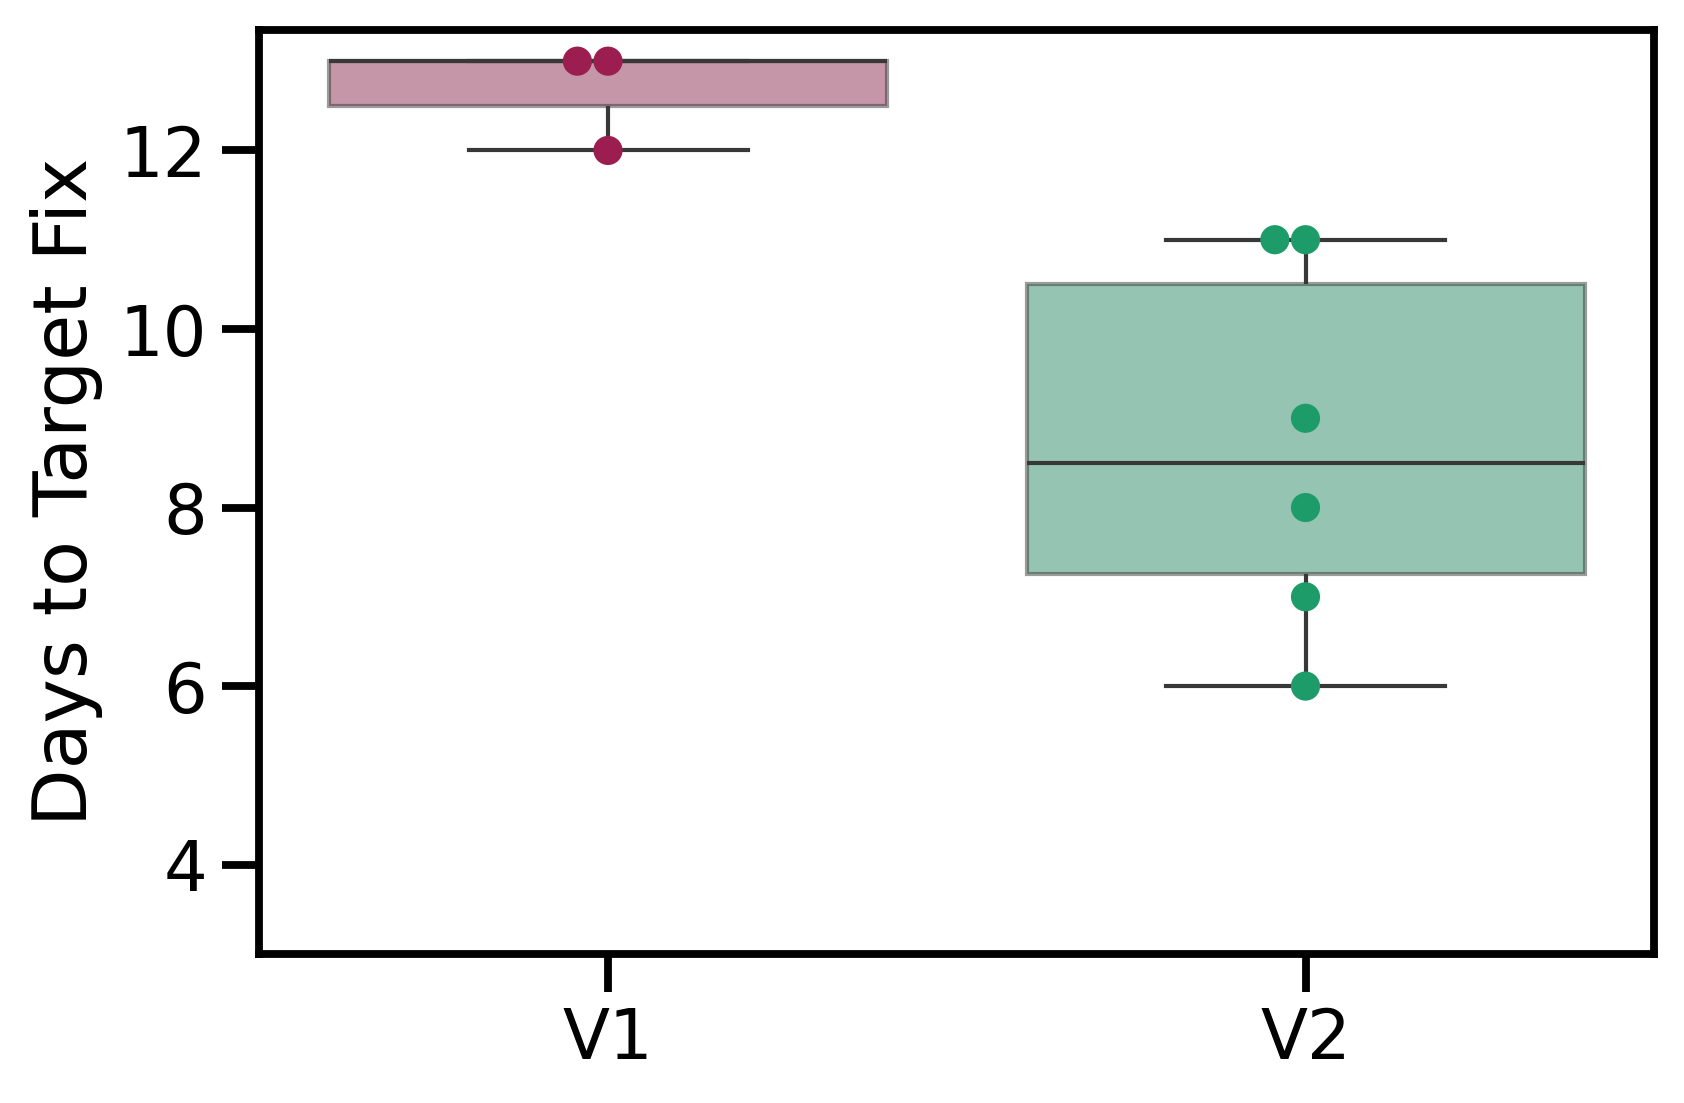

In [103]:
viz.FixationGrower.exp_compare_alpha.plot_days_to_reach_target_fix_boxplot_compare_experiment(
    tdf
)

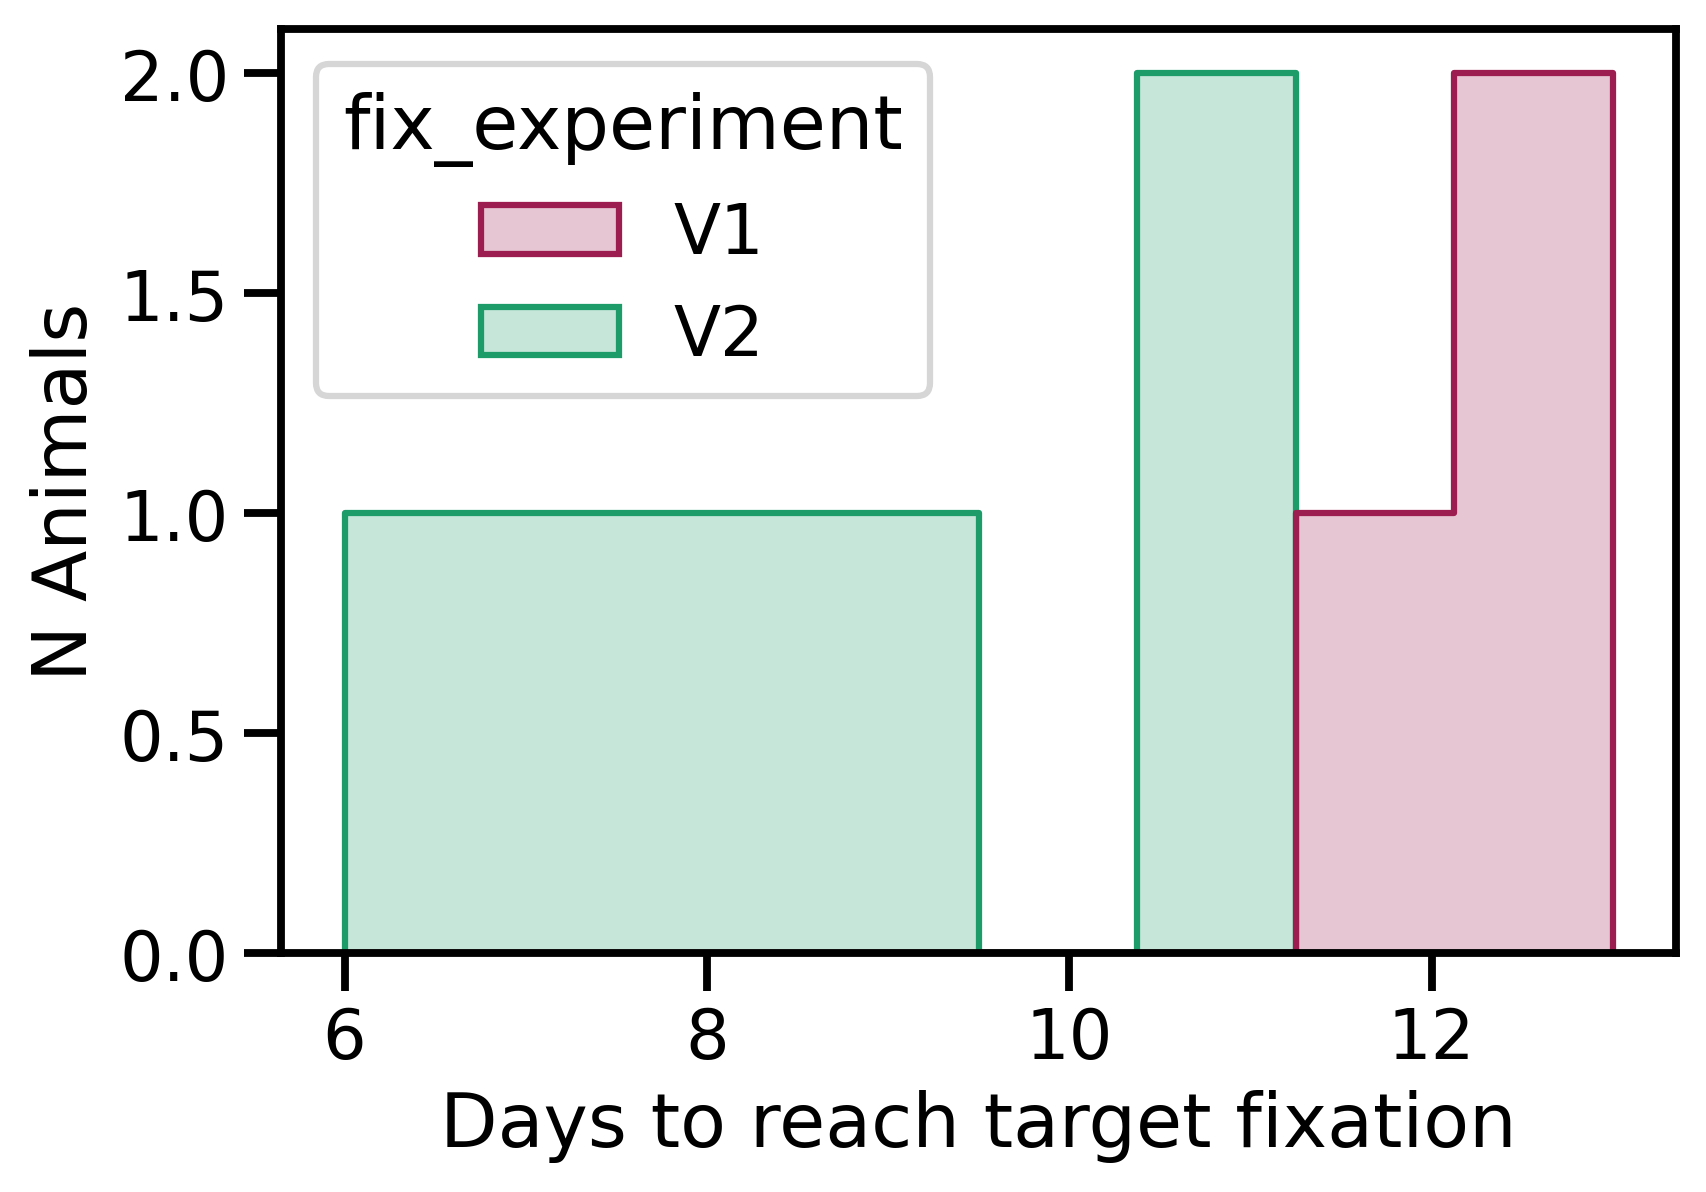

In [104]:
viz.FixationGrower.exp_compare_alpha.plot_days_to_reach_target_fix_histogram_compare_experiment(
    tdf
)

### 1.2.1 Delta Delay

In [189]:
fix_delta_df = viz.FixationGrower.df_preperation.make_fixation_delta_df(tdf)
fix_delta_df = fix_delta_df.query("stage < 8").copy()
fix_delta_df.head(10)

date animal_id  stage  days_relative_to_stage_5 fix_experiment  \
0  2024-07-30      R041    5.0                         0             V2   
1  2024-07-30      R042    5.0                         0             V1   
2  2024-07-30      R043    5.0                         0             V2   
3  2024-07-30      R045    5.0                         0             V2   
4  2024-07-30      R046    5.0                         0             V1   
5  2024-07-31      R041    5.0                         1             V2   
6  2024-07-31      R042    6.0                         1             V1   
7  2024-07-31      R043    6.0                         1             V2   
8  2024-07-31      R045    6.0                         1             V2   
9  2024-07-31      R046    6.0                         1             V1   

   max_fixation_dur  trials  fixation_delta  valid_trials  
0          0.401000     NaN             NaN          <NA>  
1          0.429000     NaN             NaN          <NA>  
2          0.401000     NaN             NaN          <NA>  
3          0.351000     NaN             NaN          <NA>  
4          0.277000     NaN             NaN          <NA>  
5          0.351000     5.0       -0.050000             5  
6          0.620000   580.0        0.191000           420  
7          0.631984   519.0        0.230984           517  
8          0.502783   355.0        0.151783           354  
9          0.358400   355.0        0.081400           268

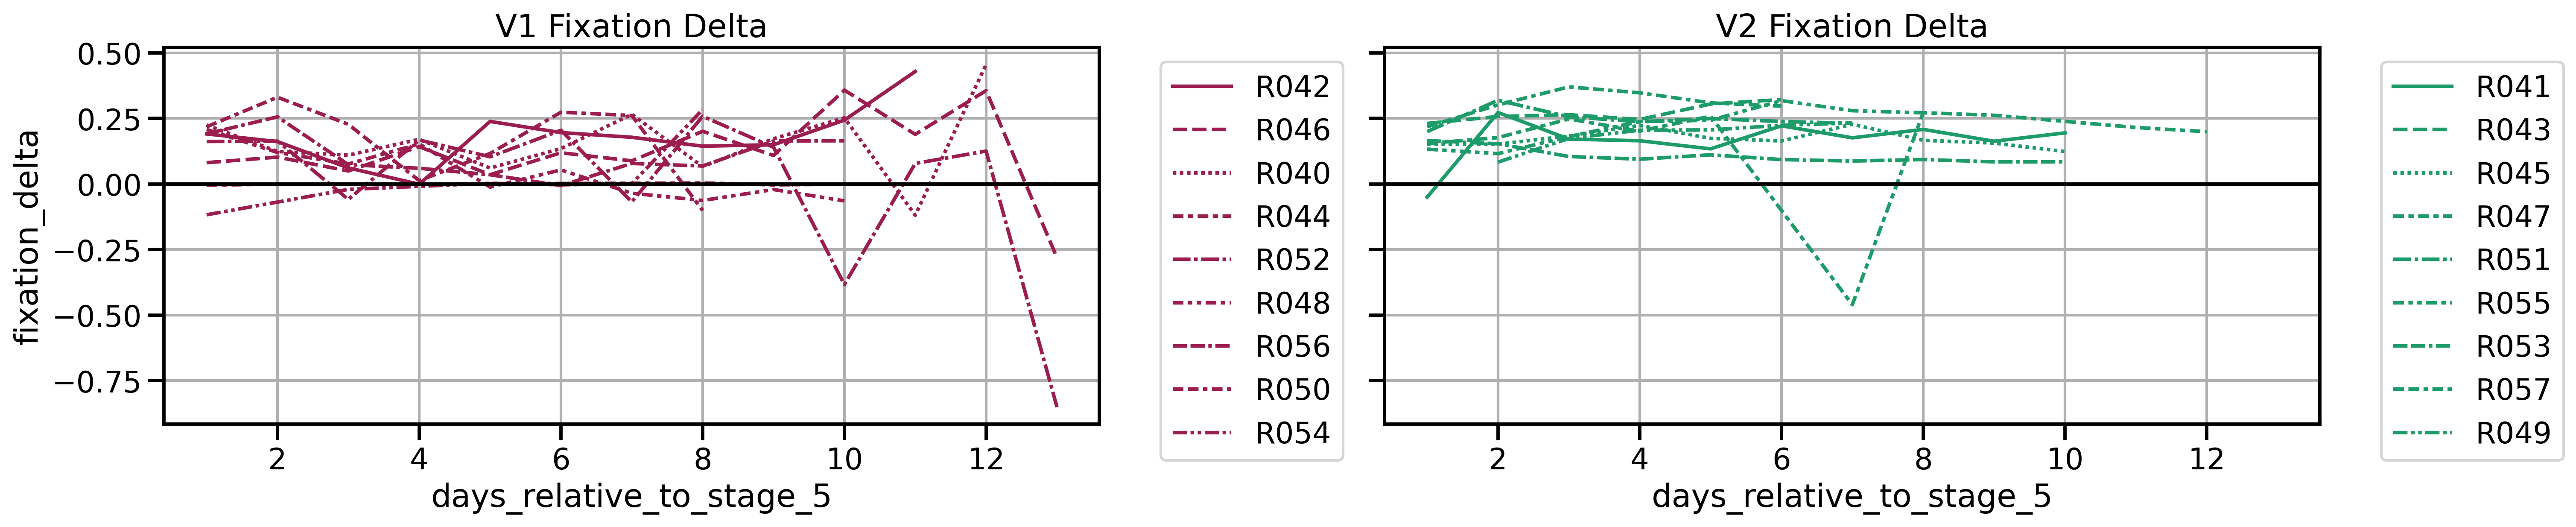

In [155]:
fig, ax = plt.subplots(
    1, 2, figsize=(20, 4), sharey=True, sharex=True, constrained_layout=True, dpi=300
)
tdf = viz.df_preperation.compute_days_relative_to_stage(tdf, stage=5)
for ii, (exp, sub_df) in enumerate(fix_delta_df.groupby("fix_experiment")):

    sns.lineplot(
        data=sub_df,
        x="days_relative_to_stage_5",
        y="fixation_delta",
        style="animal_id",
        color=pu.ALPHA_PALLETTE[ii],
        ax=ax[ii],
        lw=2,
    )
    ax[ii].grid()
    ax[ii].set_title(f"{exp} Fixation Delta")
    ax[ii].legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    ax[ii].axhline(0, color="k", lw=2)

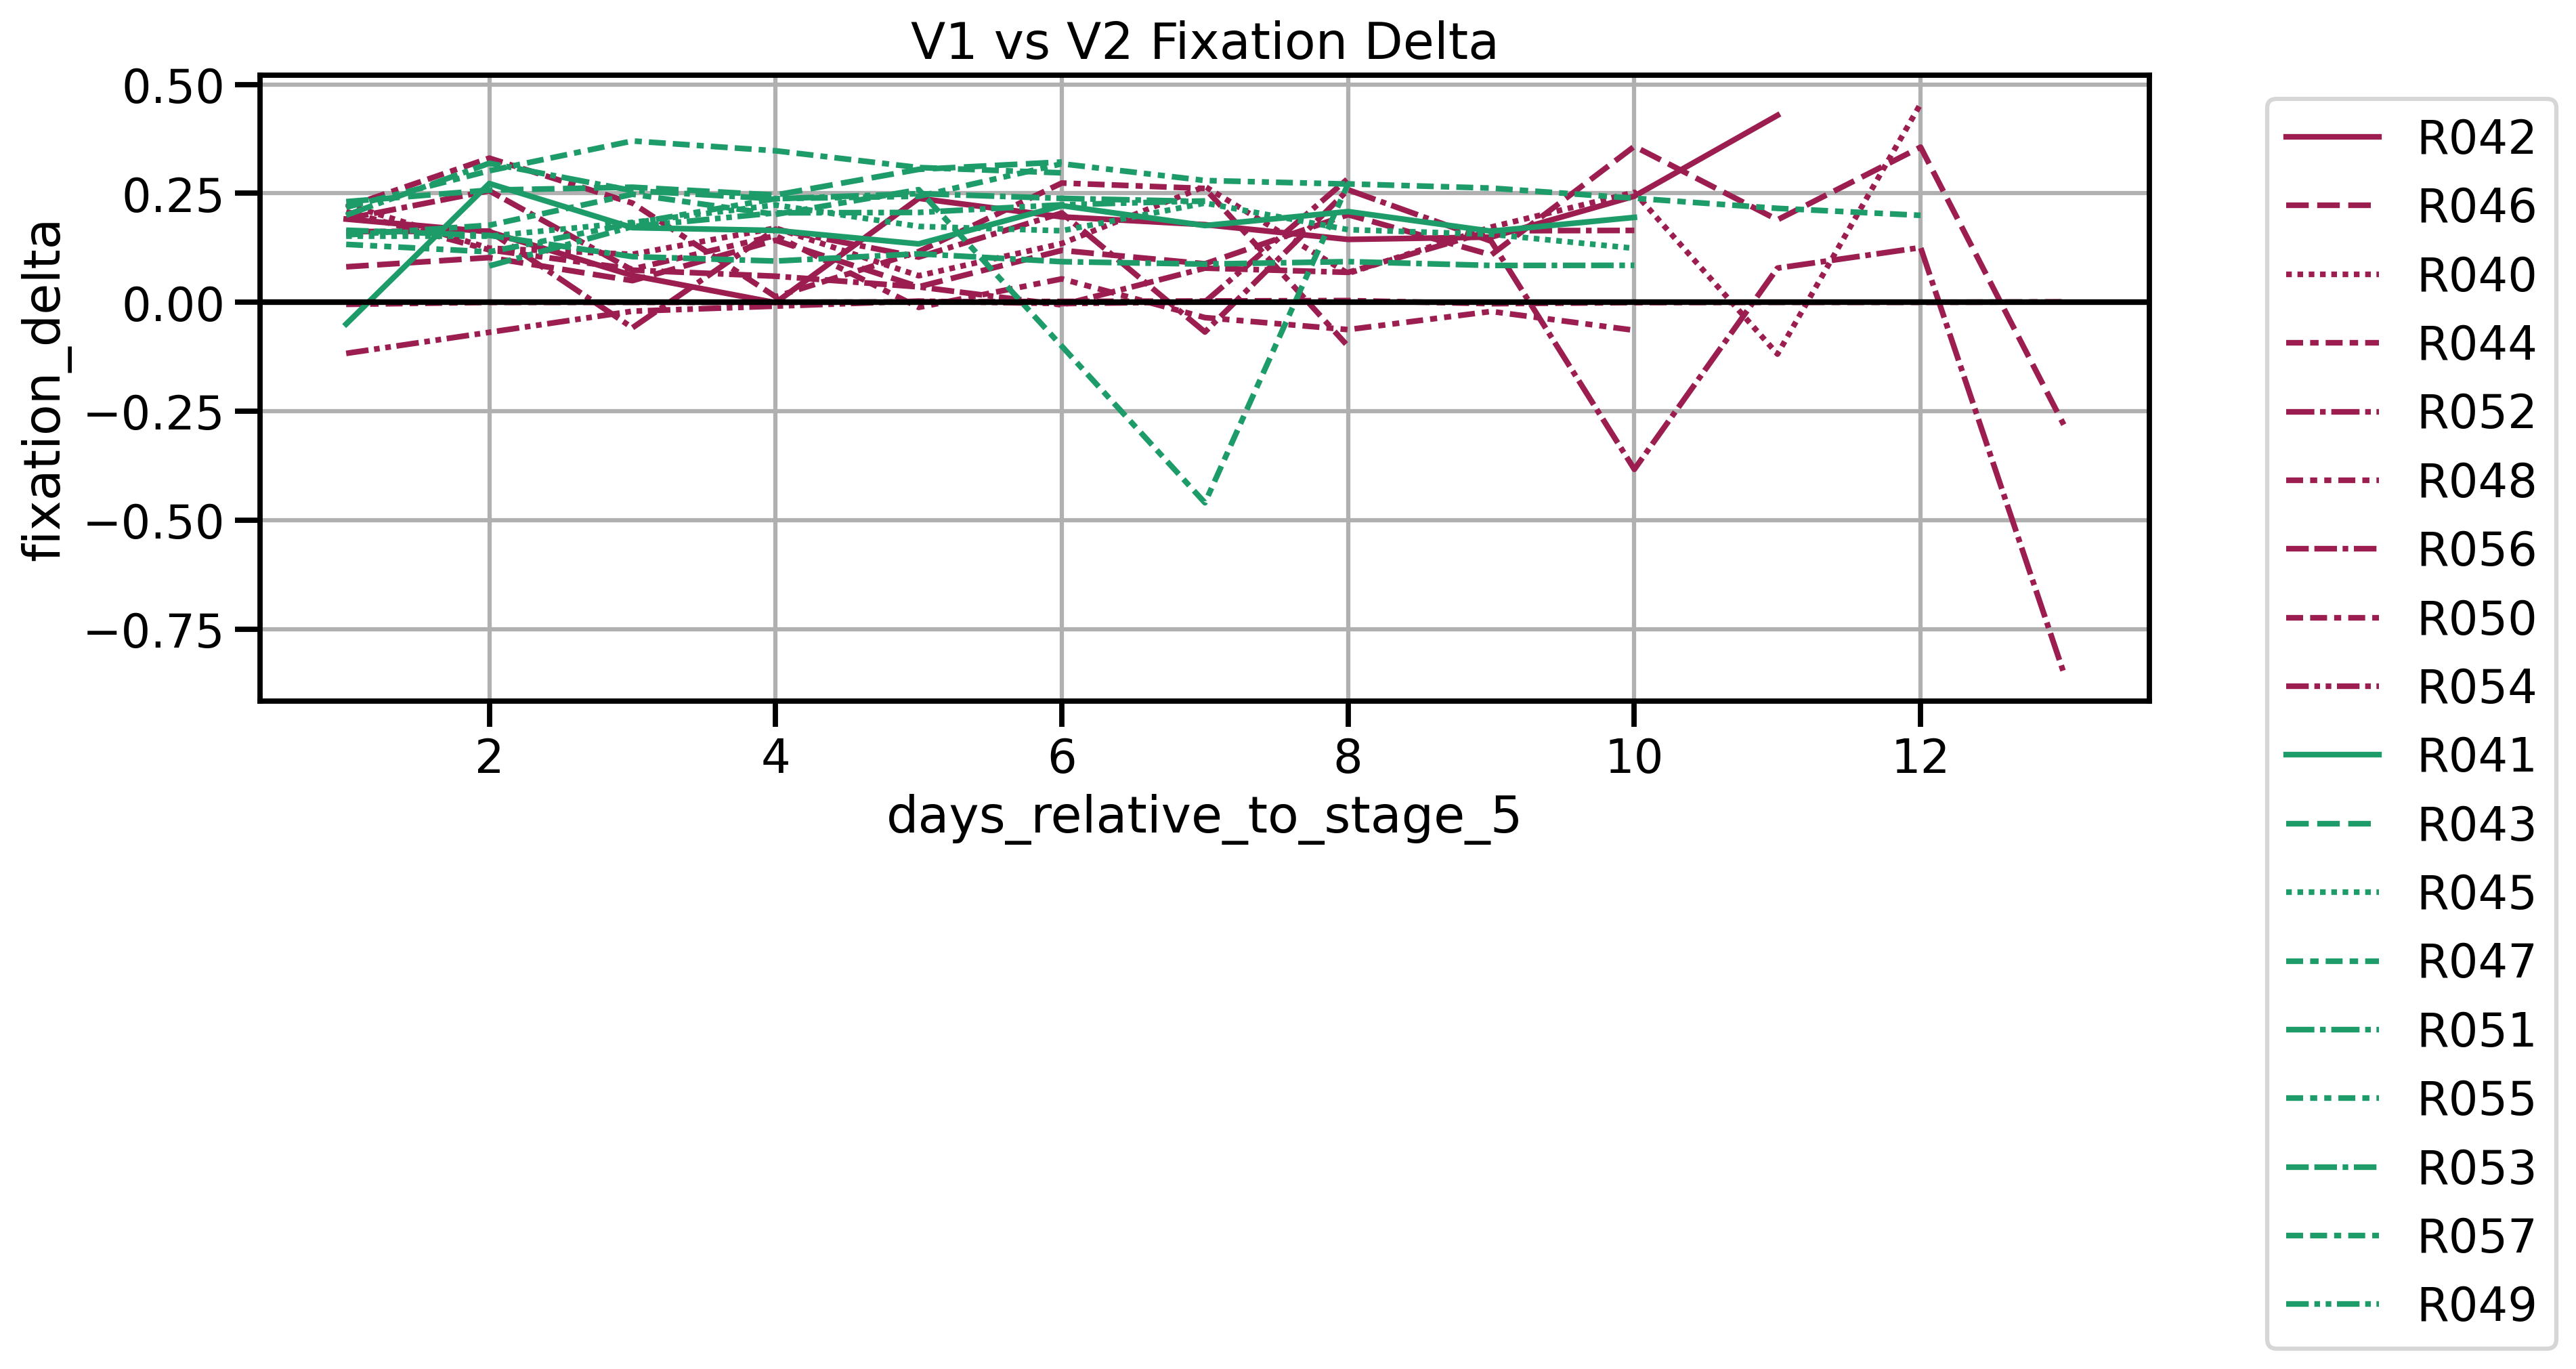

In [156]:
fig, ax = pu.make_fig()
tdf = viz.df_preperation.compute_days_relative_to_stage(tdf, stage=5)
for ii, (exp, sub_df) in enumerate(fix_delta_df.groupby("fix_experiment")):

    sns.lineplot(
        data=sub_df,
        x="days_relative_to_stage_5",
        y="fixation_delta",
        style="animal_id",
        color=pu.ALPHA_PALLETTE[ii],
        ax=ax,
        lw=2,
    )
ax.grid()
ax.set_title(f"V1 vs V2 Fixation Delta")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.axhline(0, color="k", lw=2)

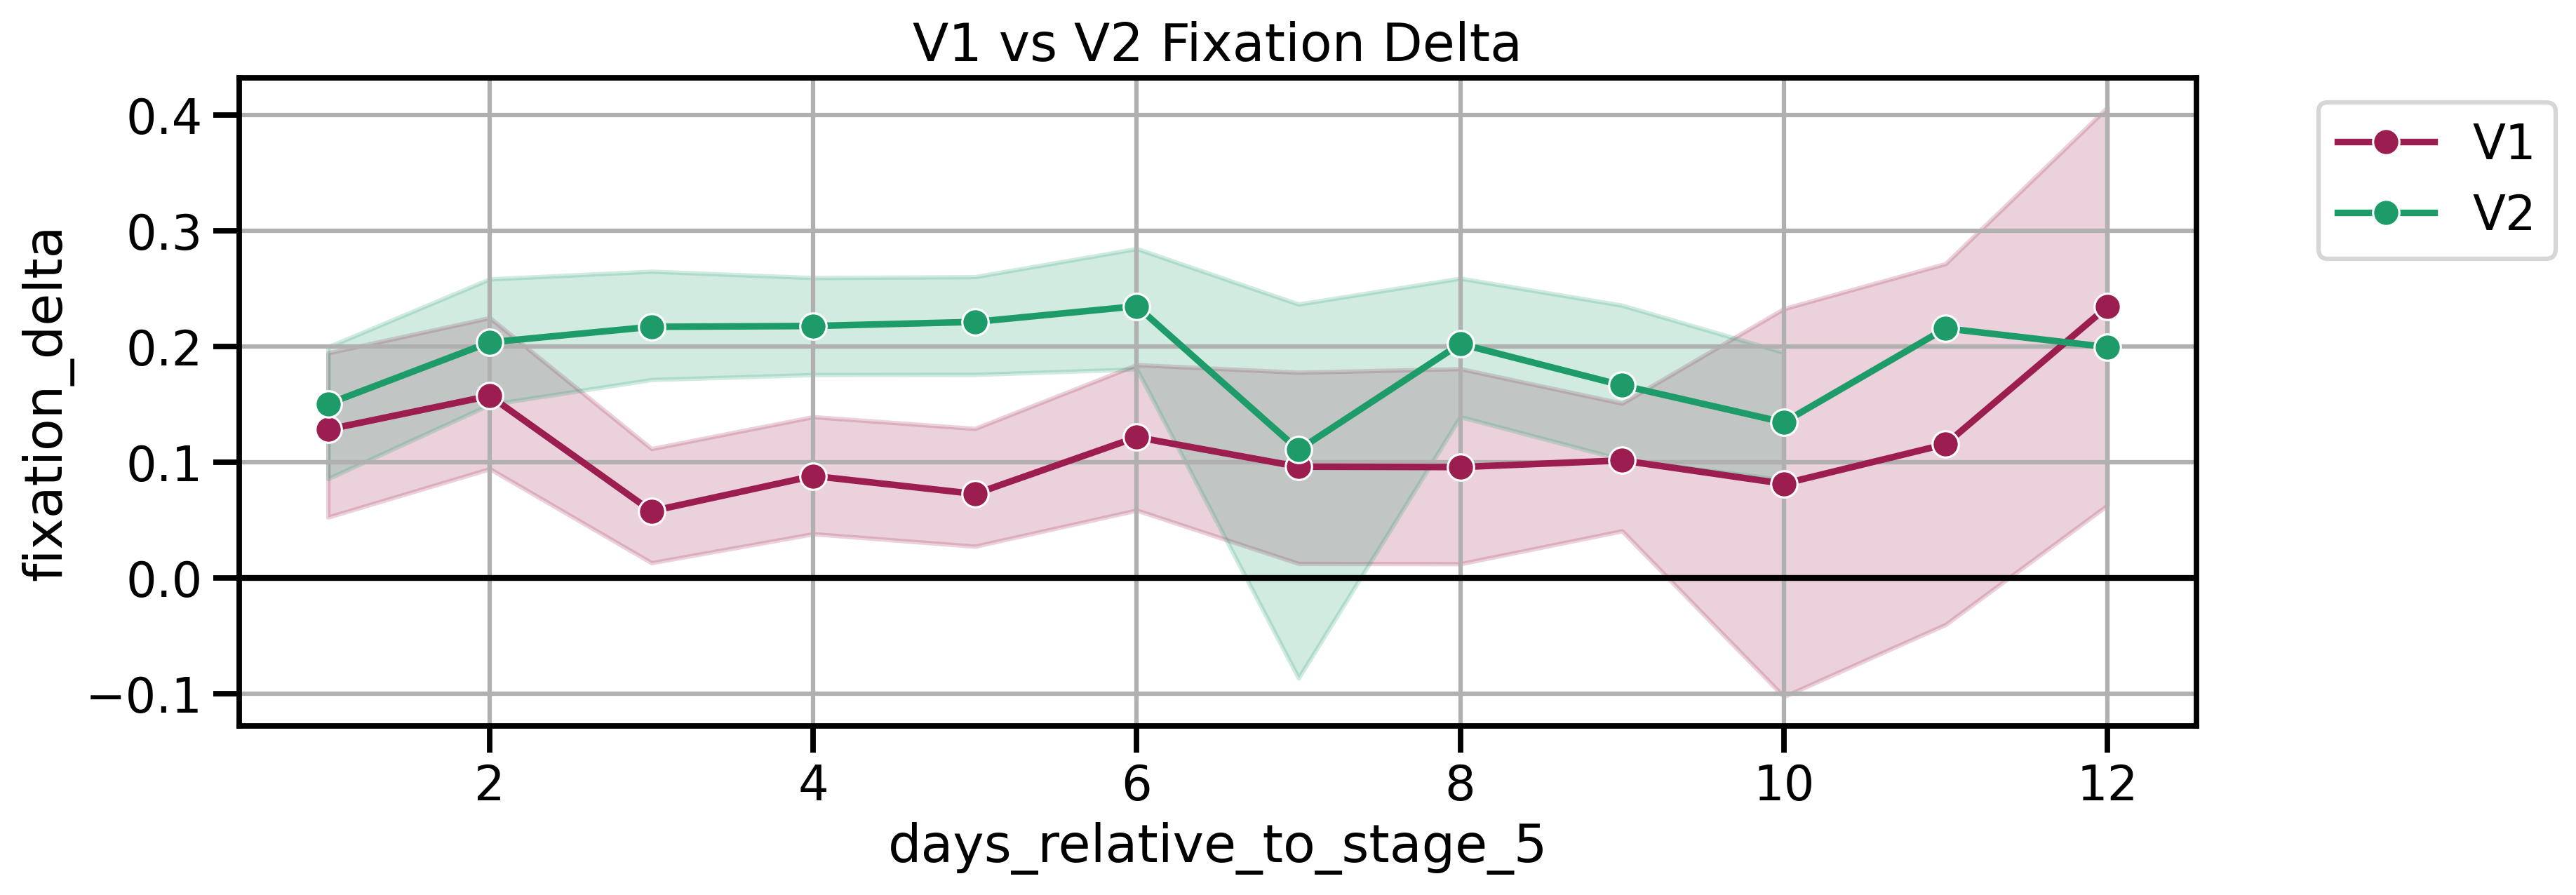

In [157]:
fig, ax = pu.make_fig()

sns.lineplot(
    data=fix_delta_df.query("days_relative_to_stage_5 <= 12"),
    x="days_relative_to_stage_5",
    y="fixation_delta",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    marker="o",
    ax=ax,
)
ax.grid()
ax.set_title(f"V1 vs V2 Fixation Delta")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.axhline(0, color="k", lw=2)

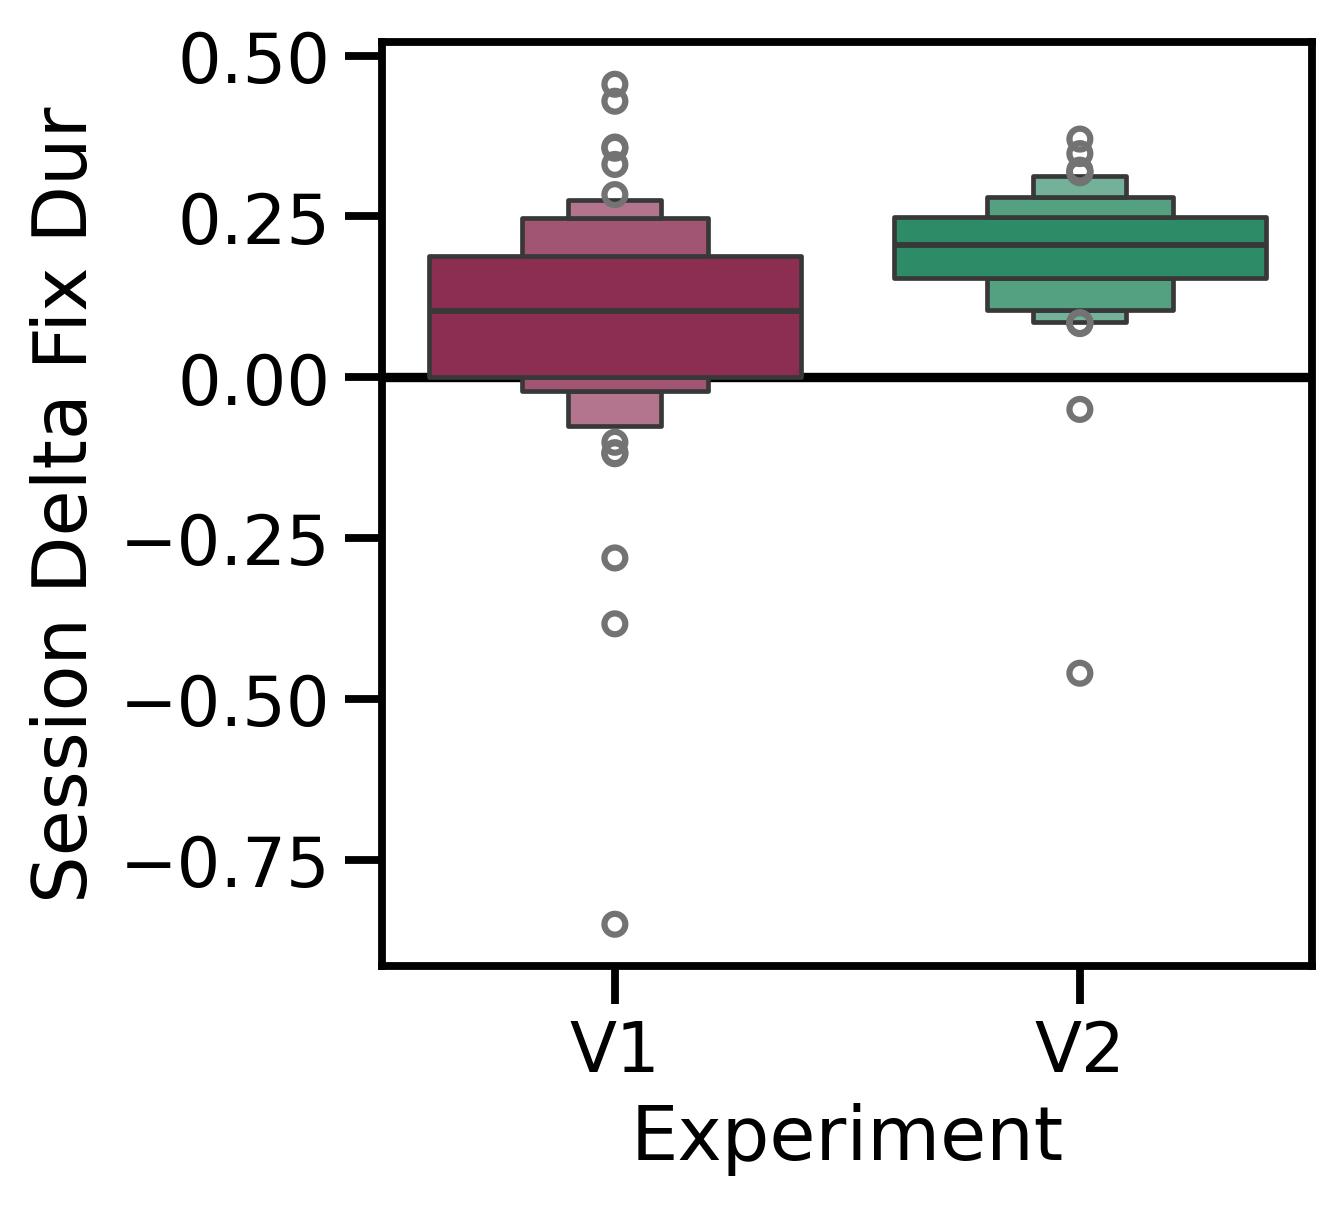

In [158]:
fig, ax = pu.make_fig("s")

# Boxplot
sns.boxenplot(
    data=fix_delta_df,
    x="fix_experiment",
    y="fixation_delta",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    dodge=False,
    ax=ax,
)


ax.axhline(0, color="black", zorder=0)

_ = ax.set(
    ylabel="Session Delta Fix Dur",
    xlabel="Experiment",
)

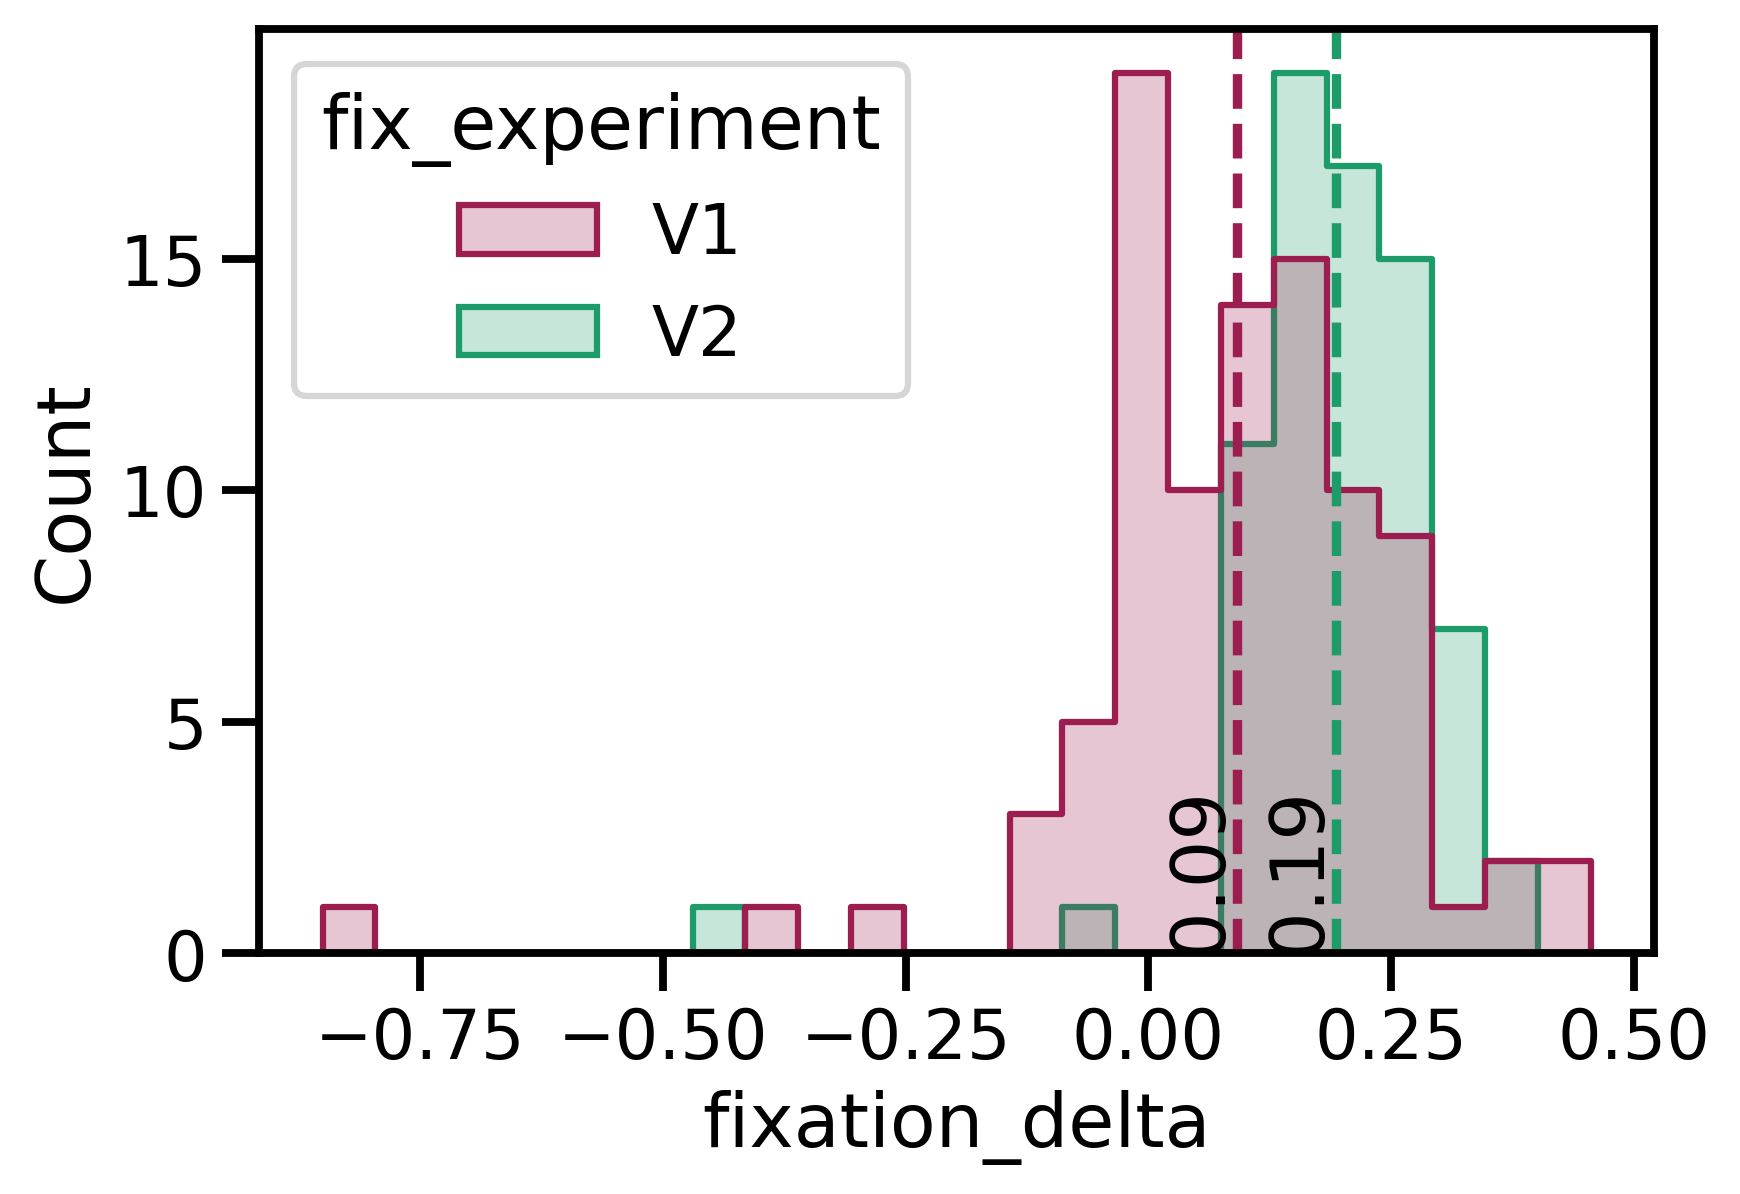

In [161]:
fig, ax = pu.make_fig("m")


sns.histplot(
    data=fix_delta_df,
    x="fixation_delta",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    ax=ax,
    element="step",
)

# mark the mean for each experiment
for ii, (exp, sub_df) in enumerate(fix_delta_df.groupby("fix_experiment")):
    mean = sub_df.fixation_delta.mean()
    ax.axvline(mean, color=pu.ALPHA_PALLETTE[ii], linestyle="--")
    ax.text(
        mean,
        0,
        f"{mean:.2f}",
        rotation=90,
        verticalalignment="bottom",
        horizontalalignment="right",
    )

### 1.2.2 Delta Delay + Trials

plot a scatter plot of n trials vs delta delay and color by coniditon

In [193]:
fix_delta_df.head(10)

date animal_id  stage  days_relative_to_stage_5 fix_experiment  \
0  2024-07-30      R041    5.0                         0             V2   
1  2024-07-30      R042    5.0                         0             V1   
2  2024-07-30      R043    5.0                         0             V2   
3  2024-07-30      R045    5.0                         0             V2   
4  2024-07-30      R046    5.0                         0             V1   
5  2024-07-31      R041    5.0                         1             V2   
6  2024-07-31      R042    6.0                         1             V1   
7  2024-07-31      R043    6.0                         1             V2   
8  2024-07-31      R045    6.0                         1             V2   
9  2024-07-31      R046    6.0                         1             V1   

   max_fixation_dur  trials  fixation_delta  valid_trials  
0          0.401000     NaN             NaN          <NA>  
1          0.429000     NaN             NaN          <NA>  
2          0.401000     NaN             NaN          <NA>  
3          0.351000     NaN             NaN          <NA>  
4          0.277000     NaN             NaN          <NA>  
5          0.351000     5.0       -0.050000             5  
6          0.620000   580.0        0.191000           420  
7          0.631984   519.0        0.230984           517  
8          0.502783   355.0        0.151783           354  
9          0.358400   355.0        0.081400           268

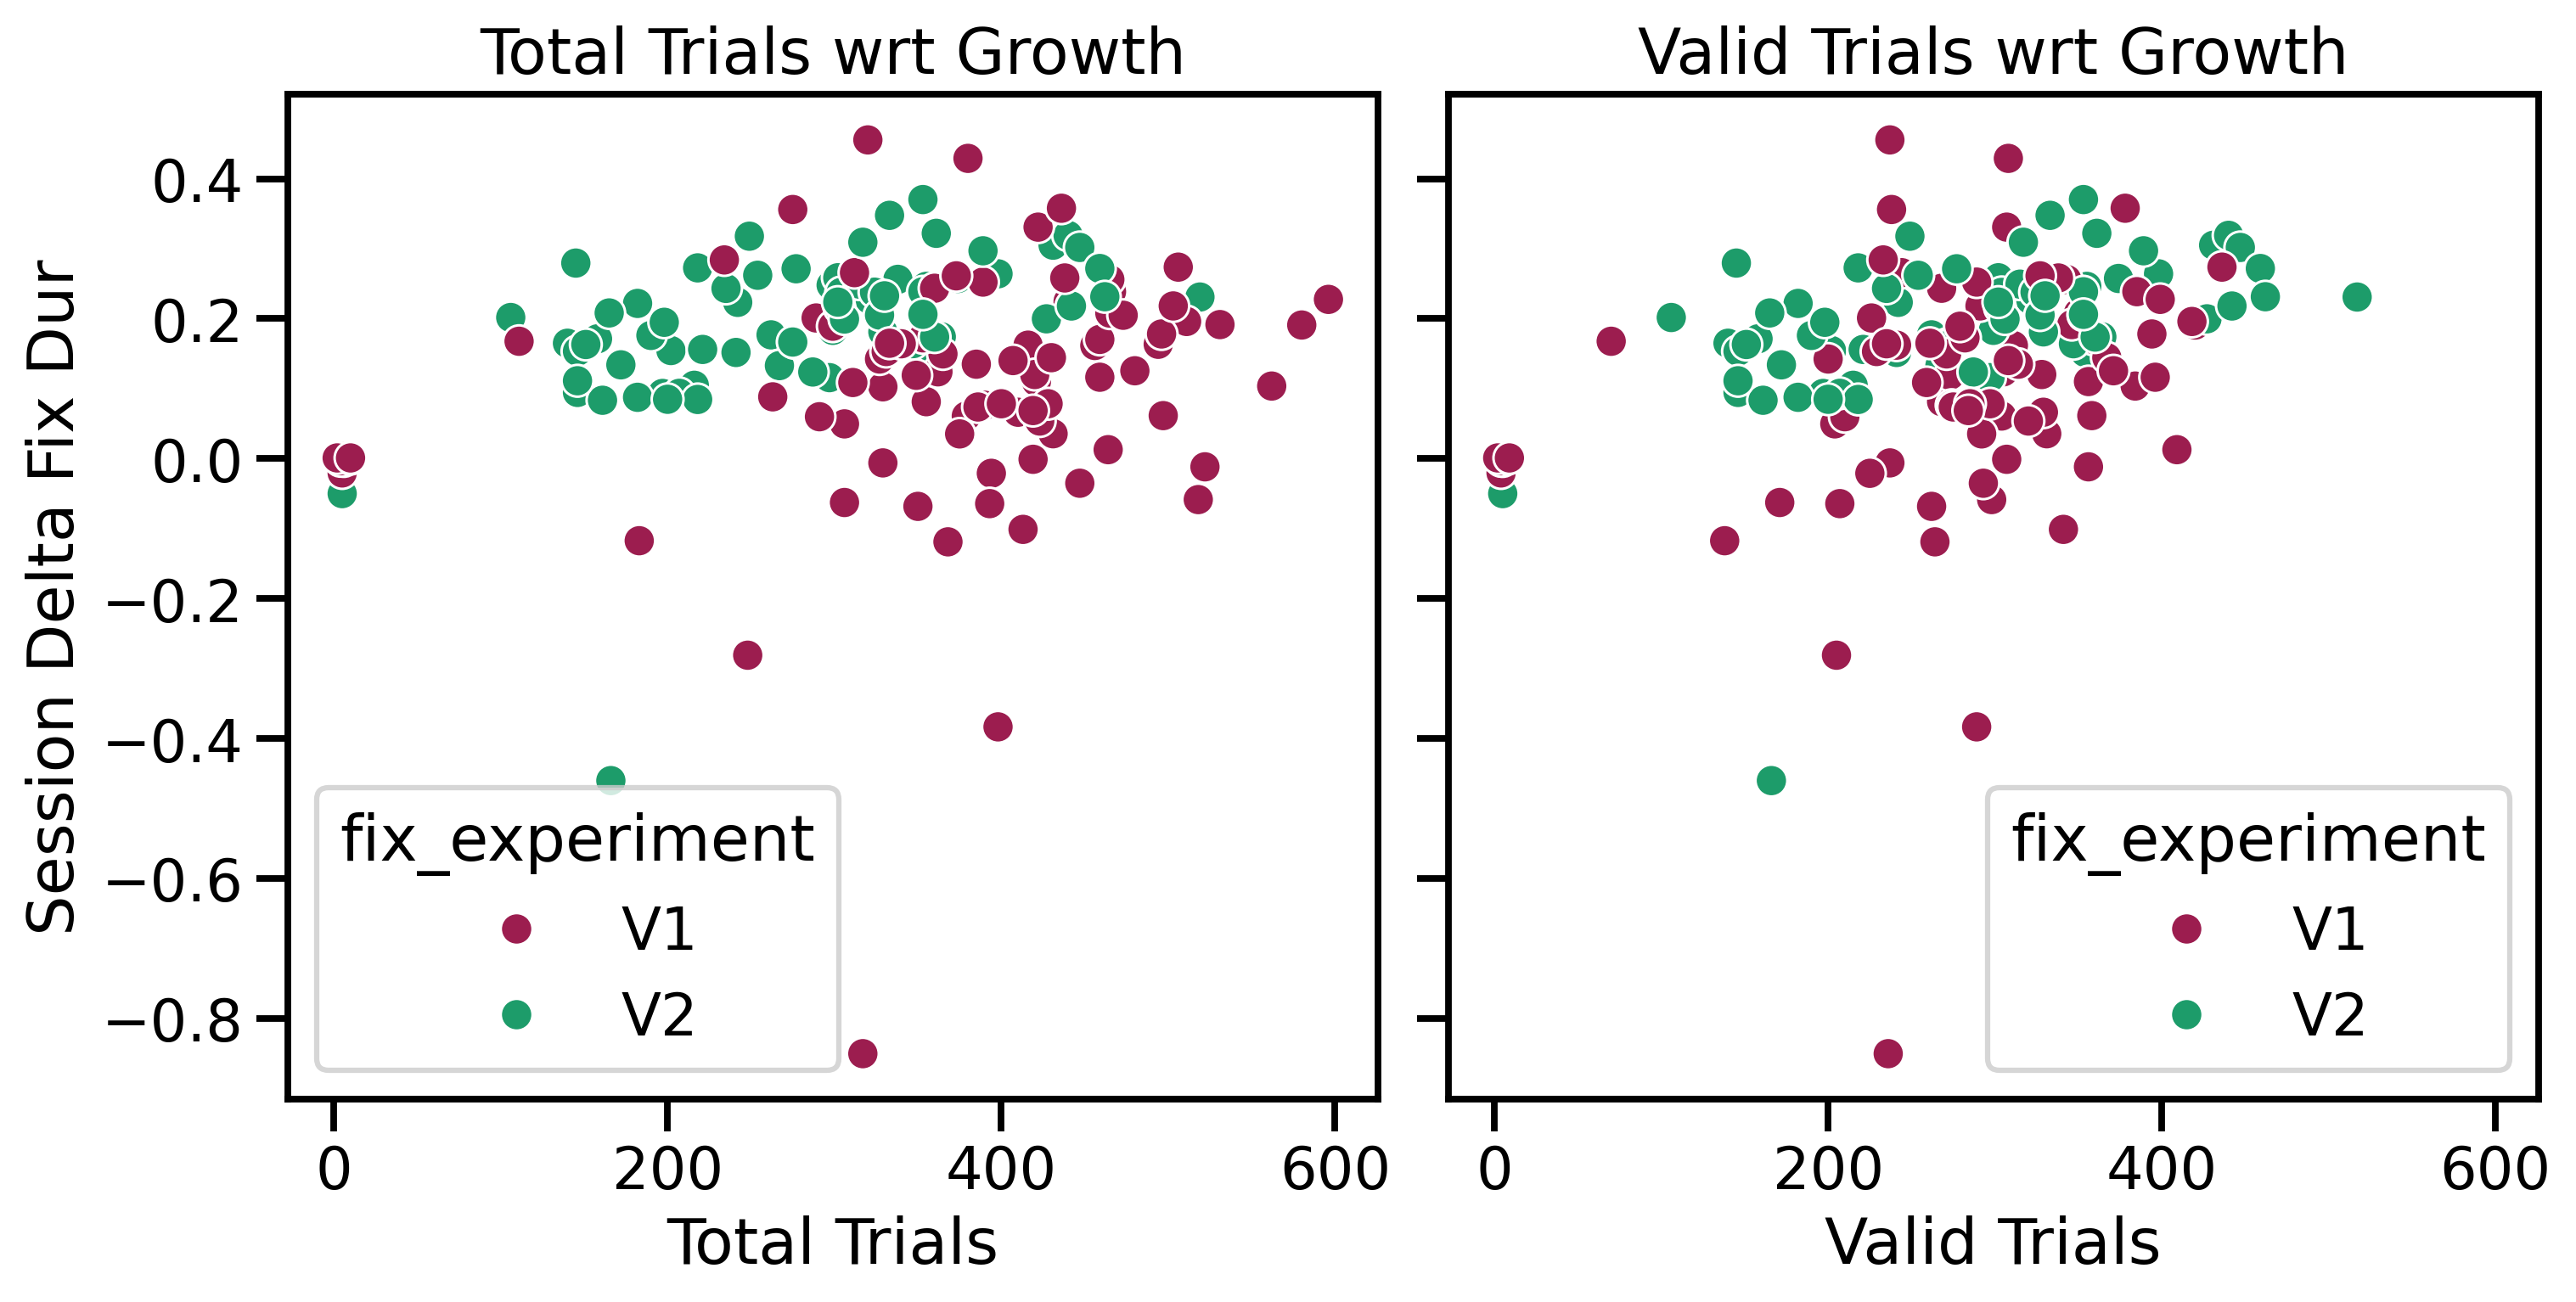

In [202]:
fig, ax = plt.subplots(
    1, 2, figsize=(10, 5), constrained_layout=True, dpi=300, sharex=True, sharey=True
)


sns.scatterplot(
    fix_delta_df,
    x="trials",
    y="fixation_delta",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    ax=ax[0],
)

_ = ax[0].set(
    ylabel="Session Delta Fix Dur",
    xlabel="Total Trials",
    title="Total Trials wrt Growth",
)

sns.scatterplot(
    fix_delta_df,
    x="valid_trials",
    y="fixation_delta",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    ax=ax[1],
)
_ = ax[1].set(
    ylabel="Session Delta Fix Dur",
    xlabel="Valid Trials",
    title="Valid Trials wrt Growth",
)

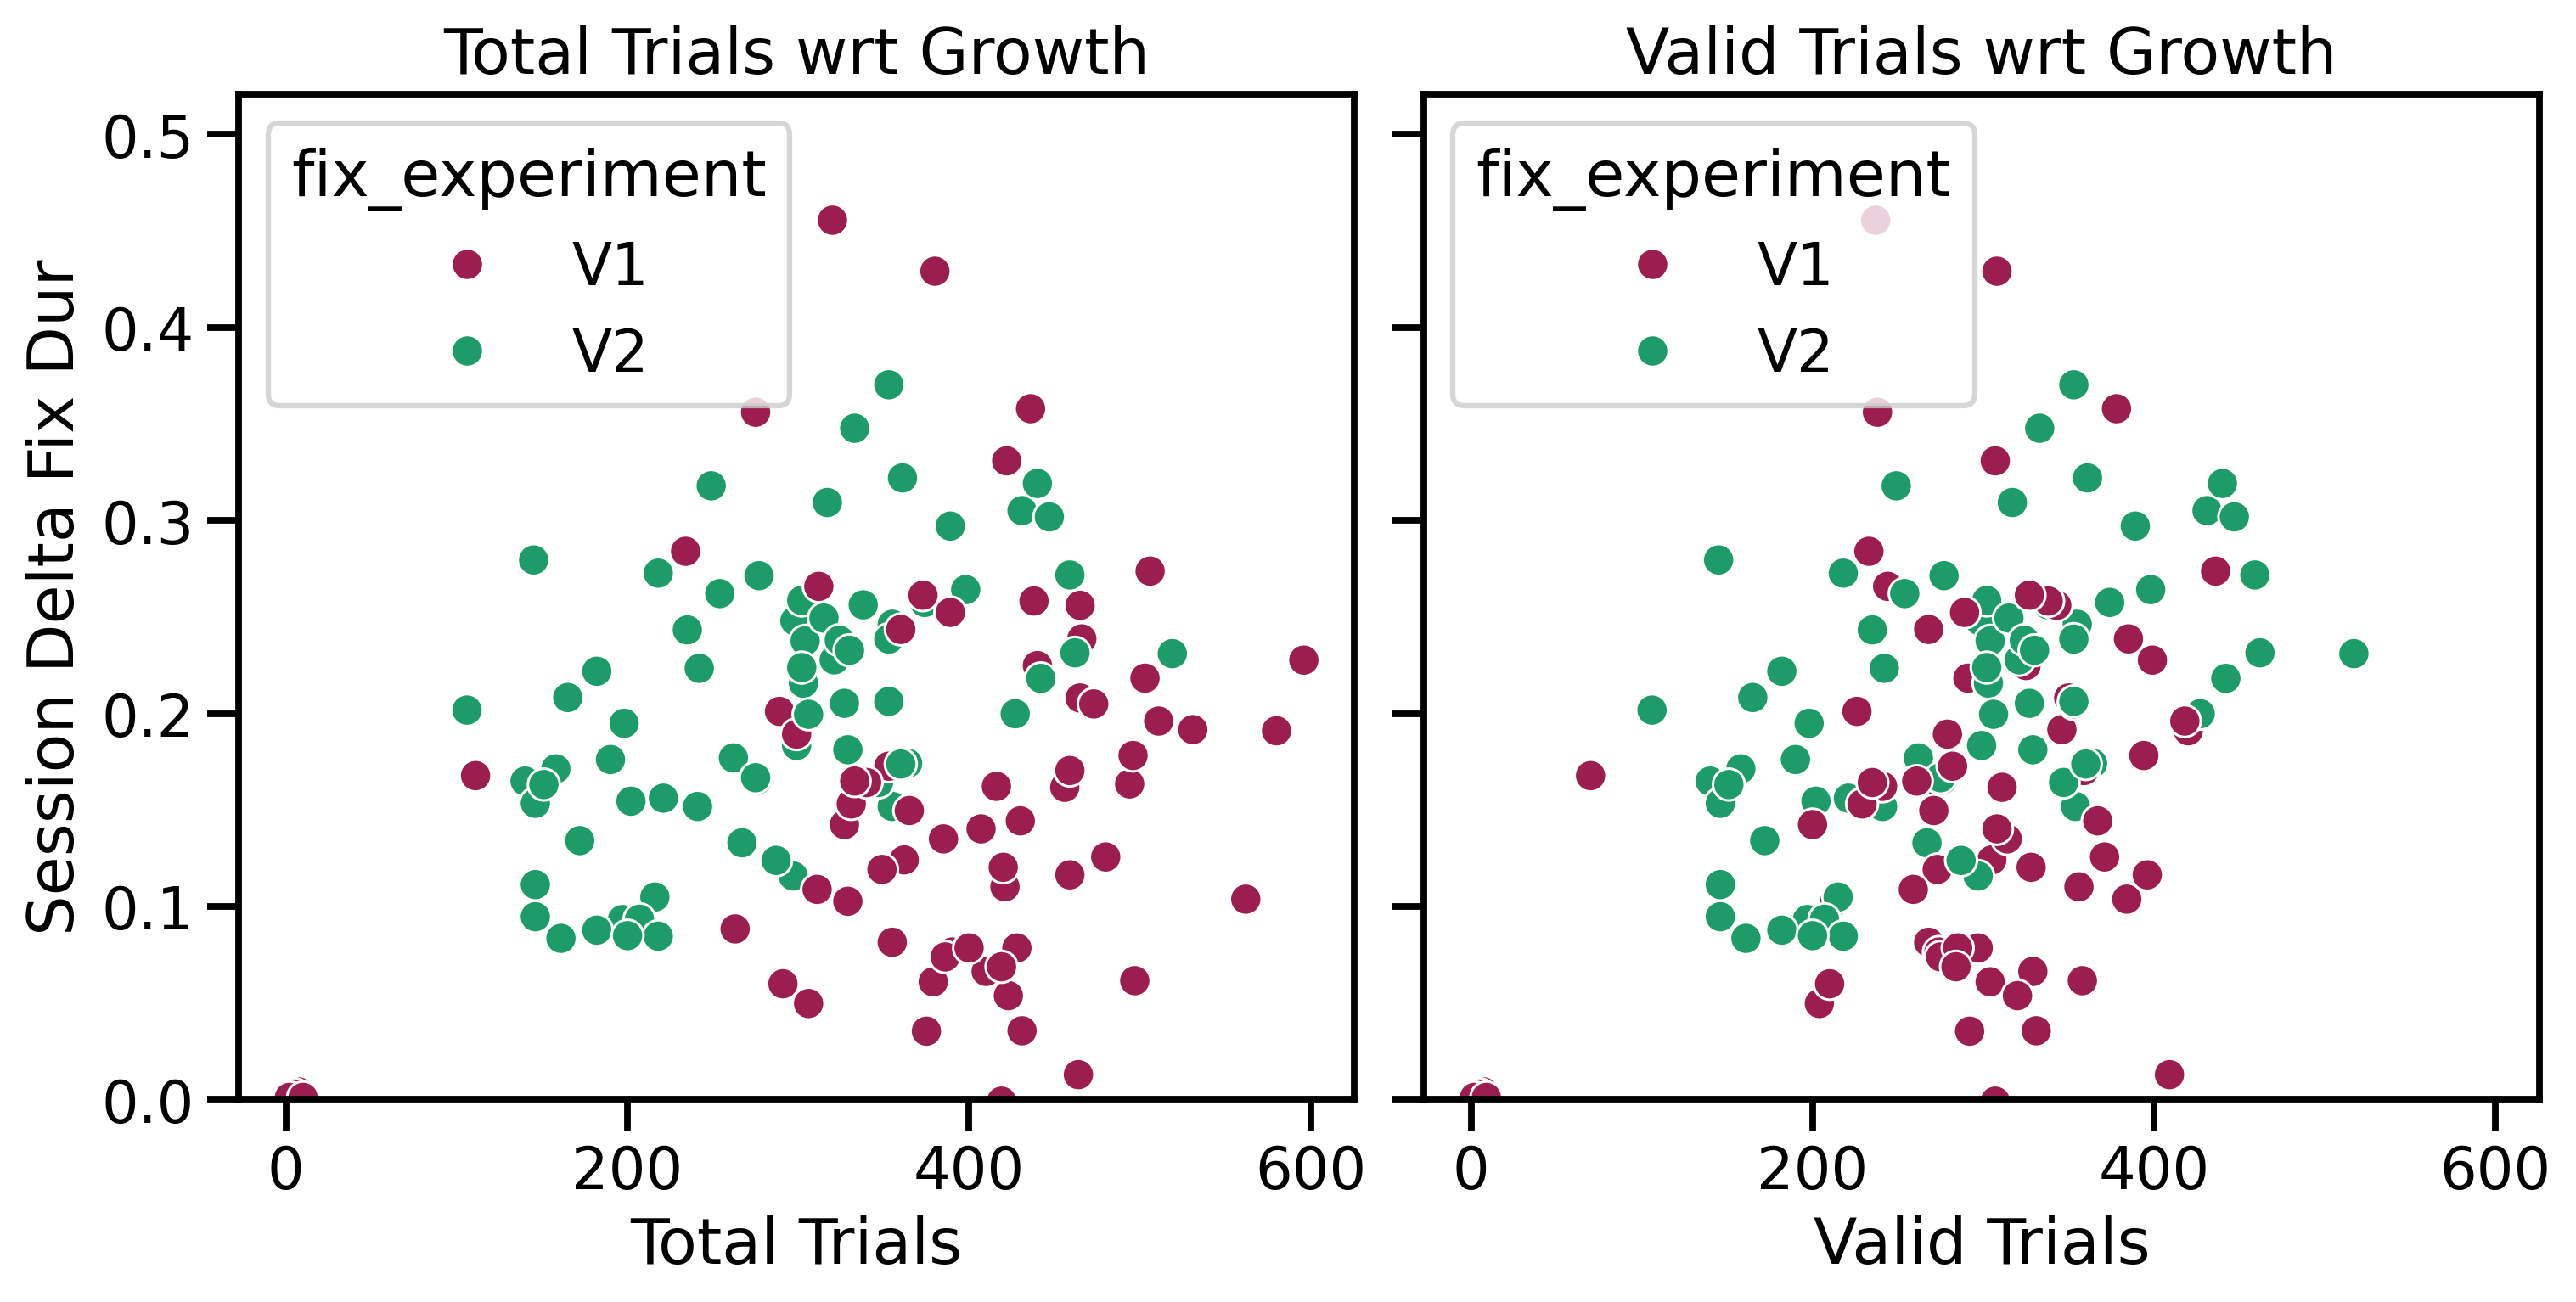

In [203]:
fig, ax = plt.subplots(
    1, 2, figsize=(10, 5), constrained_layout=True, dpi=300, sharex=True, sharey=True
)


sns.scatterplot(
    fix_delta_df,
    x="trials",
    y="fixation_delta",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    ax=ax[0],
)

_ = ax[0].set(
    ylabel="Session Delta Fix Dur",
    xlabel="Total Trials",
    title="Total Trials wrt Growth",
    ylim=(0, None),
)

sns.scatterplot(
    fix_delta_df,
    x="valid_trials",
    y="fixation_delta",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    ax=ax[1],
)
_ = ax[1].set(
    ylabel="Session Delta Fix Dur",
    xlabel="Valid Trials",
    title="Valid Trials wrt Growth",
    ylim=(0, None),
)

In [204]:
fix_delta_df.query("fix_experiment == 'V1' and fixation_delta > 0.3").head(10)

date animal_id  stage  days_relative_to_stage_5 fix_experiment  \
109  2024-08-08      R050    7.0                         2             V1   
122  2024-08-09      R046    7.0                        10             V1   
136  2024-08-10      R042    7.0                        11             V1   
157  2024-08-11      R046    7.0                        12             V1   
186  2024-08-13      R040    7.0                        12             V1   

     max_fixation_dur  trials  fixation_delta  valid_trials  
109          0.850125   422.0        0.330875           307  
122          1.563862   436.0        0.357887           378  
136          2.421724   380.0        0.429139           308  
157          2.109194   275.0        0.356072           238  
186          2.253066   320.0        0.455552           237

## 1 Title

In [227]:
v2_df = tdf[tdf["fix_experiment"].str.contains("V2", case=False)].copy()

v2_df = compute_days_relative_to_stage(v2_df, stage=8).reset_index()
v2_df = v2_df.query(
    f"days_relative_to_stage_8 >= -1 and days_relative_to_stage_8 <=1"
).copy()

# Prepare Data
failed_fix_df = viz.FixationGrower.df_preperation.compute_failed_fixation_rate_df(v2_df)

failed_fix_df = viz.FixationGrower.df_preperation.filter_failed_fix_df(
    failed_fix_df, min_stage=7, max_stage=9, settling_in_type="by_poke"
)

failed_fix_df = compute_days_relative_to_stage(failed_fix_df, 8).reset_index()
x_var = f"days_relative_to_stage_8"
xlabel = f"Days rel to stage 8"

[Text(0, 0.5, 'Failure Rate'),
 Text(0.5, 0, 'Days Relative to Penalty On'),
 (0.0, 1.0)]

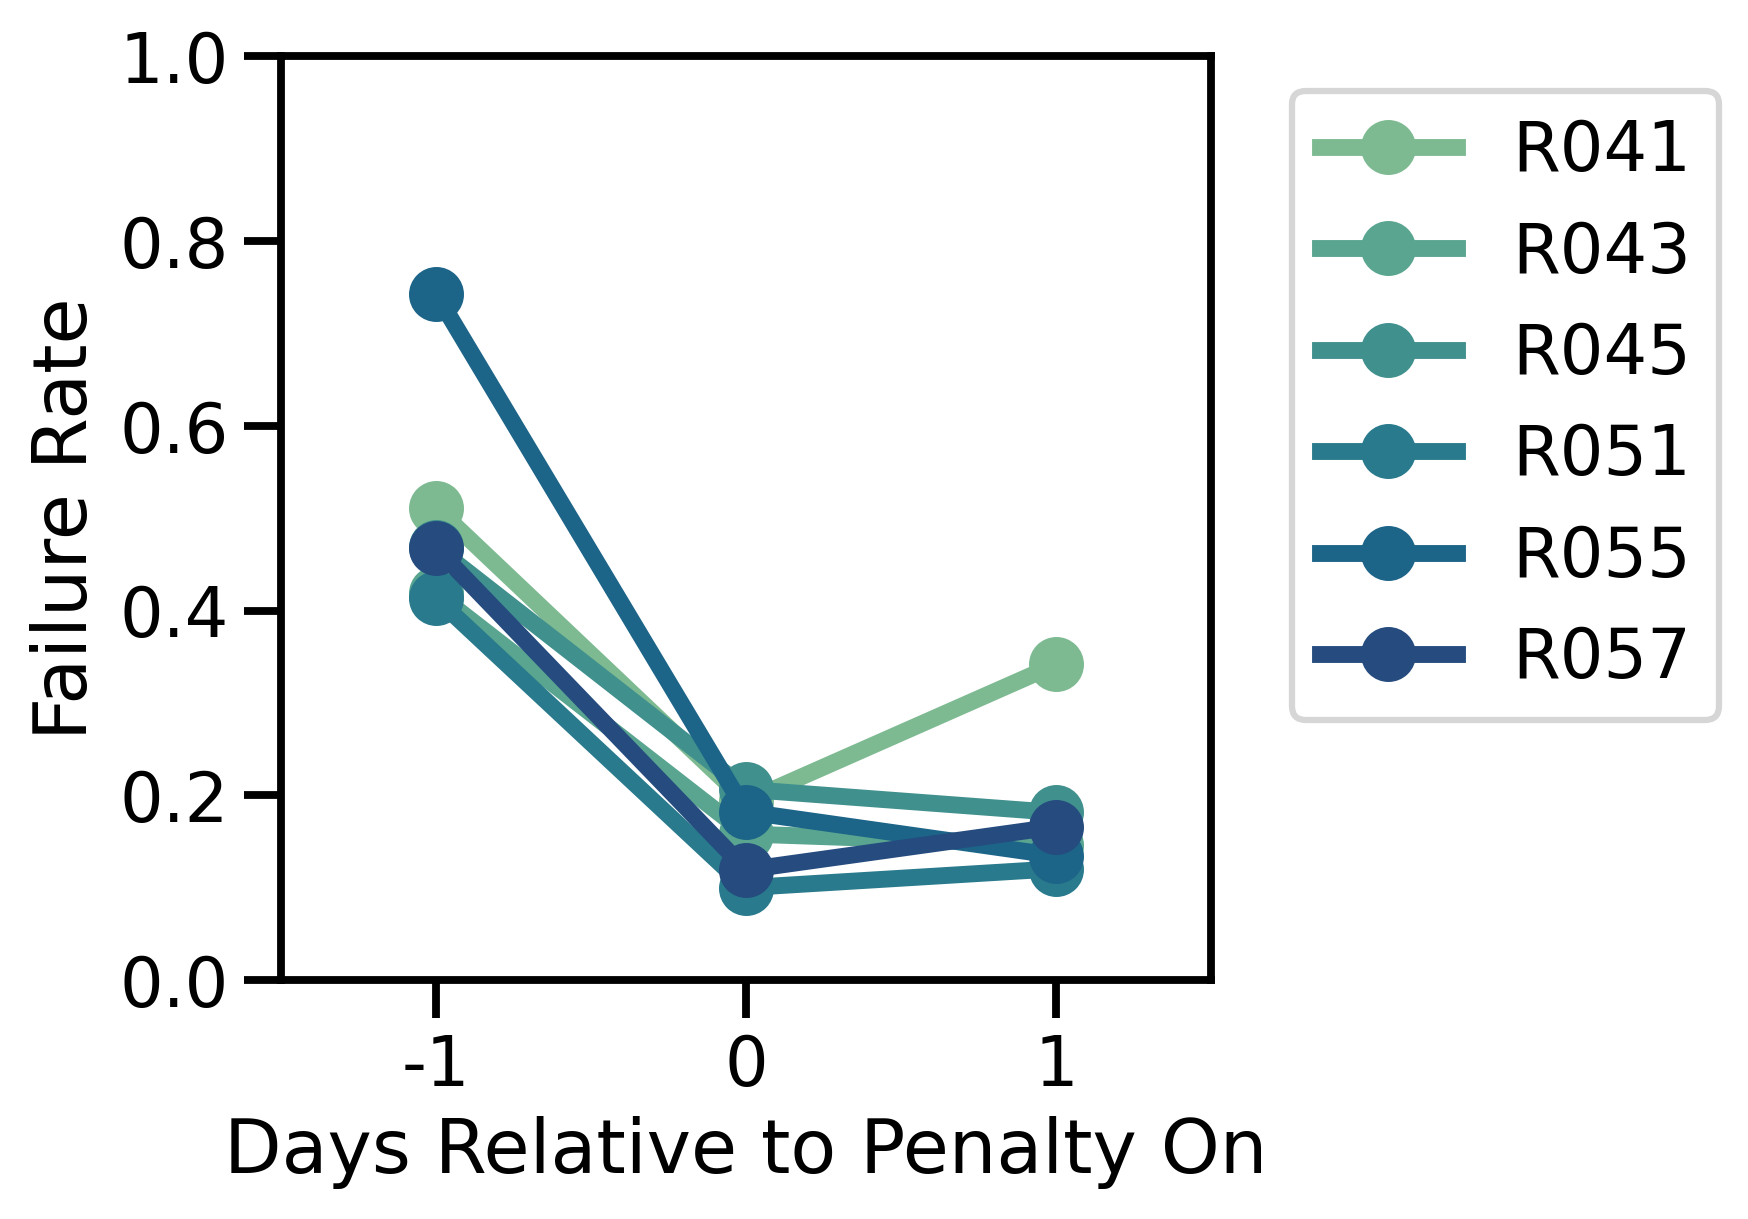

In [228]:
fig, ax = pu.make_fig("s")

sns.pointplot(
    data=failed_fix_df,
    x="days_relative_to_stage_8",
    y="failure_rate",
    hue="animal_id",
    palette=pu.ALPHA_V2_palette,
)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set(ylabel="Failure Rate", xlabel="Days Relative to Penalty On", ylim=(0, 1))